### 1) Understanding Data

* a) Understand Columns
* b) check dtype -> df[col].astype()
* c) Describe Numerical Cols
* d) Describe Categorical Cols

### 2) EXTRACT FEATURES + EDA (uni - bi(heatmap) - multi) -> Insights:
* Uni-variate Analysis
    - Histogram (values)
    - distplot (distrbution)
    - catigorical (pie / count)

* Bi-Variate Analysis
    * Num vs Num
        - Scatter (relationship btn 2 variables)
        - line (trend with time)
    * Num vs Cat (distrbution)
        - box 
        - violin
        - strip
    * Cat vs Cat
        - bar (estimate plot)
        - countplot (count rows)

* Multi-Variate Analysis
    * Pairplot

### 3) Pre-Processing Mind Map:
* a) Detect & Handle Duplicates
* b) train_test_split
* c) Detect & Handle NaNs
* d) Detect & Handle Outliers
* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])
* f) Imbalanced: X_train_resampled
* g) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

---

In [1]:
# Manpulate
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
import user_agents # get info from user_agent (browser_info)
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo # get location from ip
from geopy.distance import great_circle # distance btn 2 (lat,long)
from geopy.geocoders import Nominatim # geocode("place") / reverse("lat,long")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # text feature

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.impute import SimpleImputer, KNNImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding 
from imblearn.under_sampling import RandomUnderSampler # undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling

# Modeling
## 1) Pipeline
from sklearn.pipeline import Pipeline, make_pipeline # to make pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector # apply pipeline to each column

## 2) Regression Models
from sklearn.linear_model import LinearRegression # if data is small and small_no_features
from sklearn.linear_model import SGDRegressor # if data is large: (can have penalty=constrains)
from sklearn.preprocessing import PolynomialFeatures # for polynomial regresion (then apply scaling after it)
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV # Regularization 

## 3) Model Selection (Underfitting vs Overfitting) [bias variance tradeoff => perfect model complexity]
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV # (Train - Valid - Test) + hyperparameters tunning 
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV # if data / features is large
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Evaluate Model: r2=> accuracy, L2-norm: if no outliers, L1-norm: if outliers
from scipy import stats # Confidence Interval of Accuracy / Loss / Utility
import joblib # save model

In [2]:
df = pd.read_csv("uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
# Understand Data
df.drop(["Unnamed: 0", "key"], axis=1, inplace=True)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


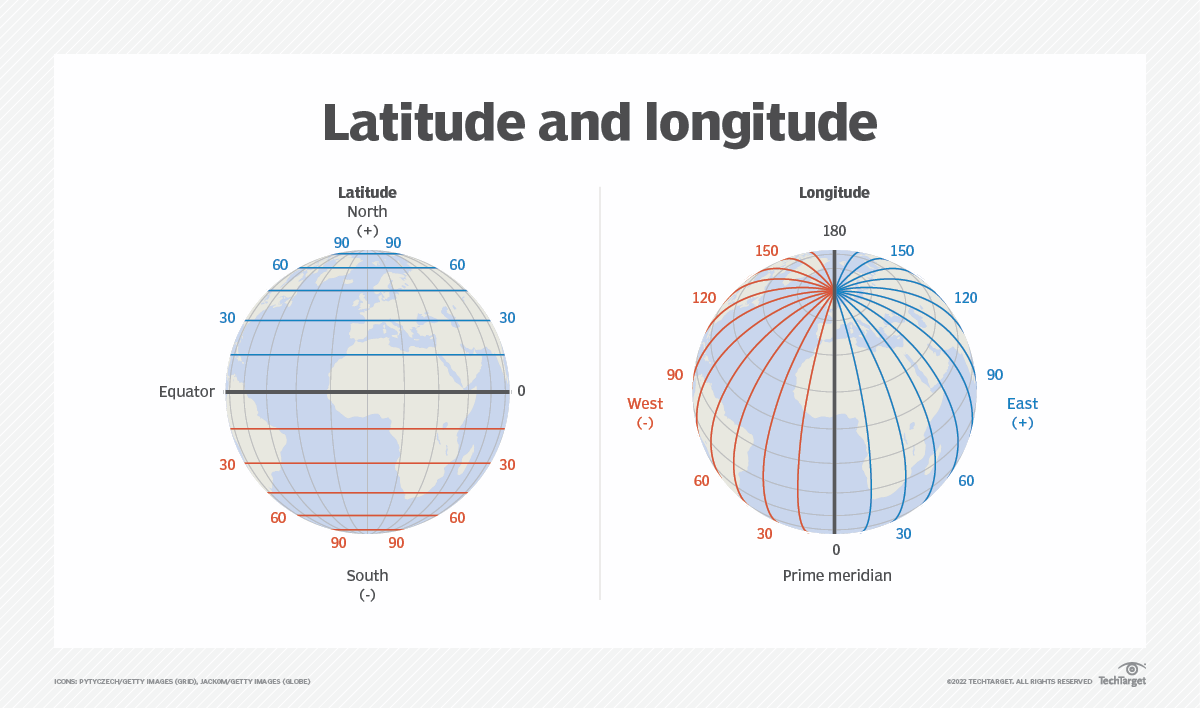

In [4]:
# check dtypes
df.info()
# pickup_datetime -> datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [5]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_datetime']

0        2015-05-07 19:52:06+00:00
1        2009-07-17 20:04:56+00:00
2        2009-08-24 21:45:00+00:00
3        2009-06-26 08:22:21+00:00
4        2014-08-28 17:47:00+00:00
                    ...           
199995   2012-10-28 10:49:00+00:00
199996   2014-03-14 01:09:00+00:00
199997   2009-06-29 00:42:00+00:00
199998   2015-05-20 14:56:25+00:00
199999   2010-05-15 04:08:00+00:00
Name: pickup_datetime, Length: 200000, dtype: datetime64[ns, UTC]

In [6]:
# Extract Features
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14


In [7]:
def get_season(arg): # month=1
    if arg in [12, 1, 2]:
        return "Winter"
    elif arg in [3, 4, 5]:
        return "Spring"
    elif arg in [6, 7, 8]:
        return "Summer"
    else: # 9 10 11
        return "Autumn"
    
df['pickup_season'] = df['pickup_month'].apply(get_season)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring


In [8]:
def get_dayperiod(arg): # hour=1
    if arg > 5 and arg < 12:
        return "Morning"
    elif arg >= 12 and arg < 17:
        return "Afternoon"
    elif arg >= 17 and arg < 22:
        return "Evenning"
    else: # 22 -> 5
        return "Night"
    
df['pickup_period'] = df['pickup_hour'].apply(get_dayperiod)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evenning
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evenning
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evenning
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evenning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,Afternoon


In [9]:
# describe num
df.describe()
# fare_amout < 0? & fare_amount == 499?
# longitude: -180 -> 180
# lat: -90 -> 90
# passenger_count = 0? & passenger_count = 208?

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535,2011.742440,6.281795,3.048425,13.491335
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997,1.856397,3.438925,1.946946,6.515531
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,2009.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,2010.000000,3.000000,1.000000,9.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,2012.000000,6.000000,3.000000,14.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,2013.000000,9.000000,5.000000,19.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,2015.000000,12.000000,6.000000,23.000000


In [10]:
# Fare_amount <= 0
df[df['fare_amount'] <= 0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period
20744,0.00,2015-04-22 23:25:07+00:00,-73.658897,40.805199,-73.658897,40.805199,1,2015,4,2,23,Spring,Night
22182,0.00,2010-03-20 02:59:51+00:00,-73.994366,40.755395,-73.998718,40.854853,2,2010,3,5,2,Spring,Night
63395,-5.00,2015-03-03 23:07:41+00:00,-73.992249,40.748936,-73.988518,40.748180,1,2015,3,1,23,Spring,Night
71246,-3.30,2010-02-11 21:47:10+00:00,-73.952725,40.768235,-73.949928,40.772208,2,2010,2,3,21,Winter,Evenning
79903,-3.50,2015-05-01 14:43:02+00:00,-73.982430,40.775024,-73.981750,40.778439,1,2015,5,4,14,Spring,Afternoon
87467,0.00,2015-01-04 03:51:13+00:00,-73.969475,40.807503,0.000000,0.000000,2,2015,1,6,3,Winter,Night
89322,-49.57,2010-03-09 08:26:10+00:00,-73.972772,40.785657,-73.972867,40.785500,5,2010,3,1,8,Spring,Morning
92063,-23.70,2010-03-12 08:49:10+00:00,-73.952740,40.768233,-74.007028,40.707338,3,2010,3,4,8,Spring,Morning
98875,-52.00,2015-03-20 21:31:14+00:00,-74.000359,40.728729,-74.005699,40.728680,5,2015,3,4,21,Spring,Evenning
104080,-7.30,2010-03-09 20:25:10+00:00,-73.952623,40.766942,-73.953787,40.784882,1,2010,3,1,20,Spring,Evenning


In [11]:
drop_fare_indices = df[df['fare_amount'] <= 0].index
df.drop(drop_fare_indices, axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evenning
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evenning
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evenning
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evenning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199973,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning
199974,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night
199975,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night
199976,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,Afternoon


In [12]:
# longitude: btn -180 -> 180
# latitude: btn -90 -> 90
# passenger_count = 208 and min=0?

In [13]:
df[(df['pickup_longitude'] >= -180) & (df['pickup_longitude'] <= 180)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evenning
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evenning
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evenning
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evenning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199973,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning
199974,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night
199975,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night
199976,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,Afternoon


In [14]:
# longitude: btn -180 -> 180
# latitude: btn -90 -> 90

df = df[
    (df['pickup_longitude'] >= -180) & (df['pickup_longitude'] <= 180)
    &
    (df['dropoff_longitude'] >= -180) & (df['dropoff_longitude'] <= 180)
    &
    (df['pickup_latitude'] >= -90) & (df['pickup_latitude'] <= 90)
    &
    (df['dropoff_latitude'] >= -90) & (df['dropoff_latitude'] <= 90)
    ]
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evenning
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evenning
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evenning
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evenning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199973,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning
199974,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night
199975,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night
199976,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,Afternoon


In [15]:
# passenger_count = 208?

df['passenger_count'].unique()

array([  1,   3,   5,   2,   4,   6,   0, 208], dtype=int64)

In [16]:
df[df['passenger_count'] > 6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period
113027,11.7,2010-12-28 08:20:00+00:00,-73.937795,40.758498,-73.937835,40.758415,208,2010,12,1,8,Winter,Morning


In [17]:
drop_count_index = df[df['passenger_count'] > 6].index
df.drop(drop_count_index, axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)
df

C:\Users\ahmed\AppData\Local\Temp\ipykernel_20824\2088777187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(drop_count_index, axis=0, inplace=True)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evenning
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evenning
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evenning
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evenning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199959,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning
199960,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night
199961,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night
199962,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,Afternoon


In [18]:
# passenger_count = 0?
df[df['passenger_count'] <= 0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period
333,10.1,2011-08-05 07:03:08+00:00,-74.013900,40.707800,-73.992300,40.749300,0,2011,8,4,7,Summer,Morning
908,11.7,2011-09-06 12:25:19+00:00,-73.981000,40.764600,-73.962900,40.778400,0,2011,9,1,12,Autumn,Afternoon
926,3.3,2012-03-26 18:11:24+00:00,-73.979978,40.765821,-73.983894,40.766873,0,2012,3,0,18,Spring,Evenning
2000,15.7,2012-04-20 15:07:57+00:00,-73.975285,40.750138,-73.974729,40.783151,0,2012,4,4,15,Spring,Afternoon
3011,6.1,2012-01-07 19:19:08+00:00,-73.977900,40.789100,-73.983700,40.773600,0,2012,1,5,19,Winter,Evenning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196763,3.3,2011-01-17 15:52:26+00:00,-74.000760,40.757637,-74.004852,40.751947,0,2011,1,0,15,Winter,Afternoon
197069,7.3,2011-12-10 15:33:12+00:00,0.000000,0.000000,0.000000,0.000000,0,2011,12,5,15,Winter,Afternoon
198837,5.7,2011-09-20 19:55:05+00:00,-73.980300,40.742800,-73.967900,40.755600,0,2011,9,1,19,Autumn,Evenning
198867,12.1,2011-08-22 21:10:56+00:00,-73.996700,40.737200,-74.008500,40.704000,0,2011,8,0,21,Summer,Evenning


In [19]:
drop_count_index = df[df['passenger_count'] <= 0].index
df.drop(drop_count_index, axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)
df

C:\Users\ahmed\AppData\Local\Temp\ipykernel_20824\4006362922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(drop_count_index, axis=0, inplace=True)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evenning
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evenning
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evenning
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evenning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199251,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning
199252,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night
199253,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night
199254,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,Afternoon


In [20]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour
count,199256.000000,199256.000000,199256.000000,199256.000000,199256.000000,199256.000000,199256.000000,199256.000000,199256.000000,199256.000000
mean,11.369376,-72.504173,39.919172,-72.514408,39.923484,1.689440,2011.743712,6.283464,3.049369,13.492793
std,9.905986,10.442243,6.127757,10.403044,6.114307,1.305386,1.859075,3.438457,1.946786,6.516099
min,0.010000,-93.824668,-74.015515,-75.458979,-74.015750,1.000000,2009.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992063,40.734794,-73.991409,40.733828,1.000000,2010.000000,3.000000,1.000000,9.000000
50%,8.500000,-73.981825,40.752582,-73.980094,40.753041,1.000000,2012.000000,6.000000,3.000000,14.000000
75%,12.500000,-73.967162,40.767155,-73.963663,40.767995,2.000000,2013.000000,9.000000,5.000000,19.000000
max,499.000000,40.808425,48.018760,40.831932,45.031598,6.000000,2015.000000,12.000000,6.000000,23.000000


In [21]:
df[df['fare_amount'] < 1] # see distance

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period
21585,0.01,2015-05-31 16:13:41+00:00,-73.991692,40.770802,-73.991692,40.770824,1,2015,5,6,16,Spring,Afternoon
148793,0.11,2010-03-07 19:11:43+00:00,-73.997221,40.721345,-73.997252,40.721344,1,2010,3,6,19,Spring,Evenning
190518,0.01,2010-03-08 18:44:57+00:00,-74.000523,40.725868,-73.956960,40.780855,1,2010,3,0,18,Spring,Evenning


In [22]:
# cat_describe
cat_cols = df.select_dtypes(include="O").columns
for col in cat_cols:
    print(f"number of uniques of \'{col}\' is: {df[col].nunique()}")
    print(f"uniques of \'{col}\' is:\n{df[col].unique()}")
    print()
    print('*' * 50)
    print()

number of uniques of 'pickup_season' is: 4
uniques of 'pickup_season' is:
['Spring' 'Summer' 'Winter' 'Autumn']

**************************************************

number of uniques of 'pickup_period' is: 4
uniques of 'pickup_period' is:
['Evenning' 'Morning' 'Night' 'Afternoon']

**************************************************



In [23]:
for col in cat_cols:
    print(f"count of uniques of \'{col}\' is:\n{df[col].value_counts()}")
    print()
    print('*' * 50)
    print()

count of uniques of 'pickup_season' is:
Spring    55969
Winter    49663
Summer    46965
Autumn    46659
Name: pickup_season, dtype: int64

**************************************************

count of uniques of 'pickup_period' is:
Evenning     57419
Morning      47963
Afternoon    47435
Night        46439
Name: pickup_period, dtype: int64

**************************************************



# Extract Features + EDA

In [24]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evenning
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evenning
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evenning
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evenning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199251,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning
199252,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night
199253,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night
199254,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,Afternoon


In [25]:
location_1 = ("40.738354", "-73.999817") # (lat, lon)
location_2 = ("40.723217", "-73.999512") # (lat, lat)
great_circle(location_1, location_2).km

1.6833561741232284

In [26]:
# Extract Features: (distance - pickupcity - dropoffcity)
def get_distance(row):
    location_1 = (row['pickup_latitude'], row['pickup_longitude'])
    location_2 = (row['dropoff_latitude'], row['dropoff_longitude'])
    return great_circle(location_1, location_2).km # (lat, lon)

df['distance'] = df.apply(get_distance, axis=1)
df['distance']

C:\Users\ahmed\AppData\Local\Temp\ipykernel_20824\685208691.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'] = df.apply(get_distance, axis=1)


0          1.683325
1          2.457593
2          5.036384
3          1.661686
4          4.475456
            ...    
199251     0.112210
199252     1.875053
199253    12.850337
199254     3.539720
199255     5.417791
Name: distance, Length: 199256, dtype: float64

## Calculate the distance between the pickup and drop co-ordinates using the Haversine formual for accuracy
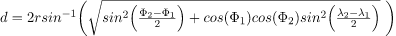

In [27]:
def haversine_distance(lon_1, lon_2, lat_1, lat_2):
    
    lon_1, lon_2, lat_1, lat_2 = map(np.radians, [lon_1, lon_2, lat_1, lat_2])  #Degrees to Radians
    
    
    diff_lon = lon_2 - lon_1
    diff_lat = lat_2 - lat_1
    

    km = 2 * 6371 * np.arcsin(np.sqrt(np.sin(diff_lat/2.0)**2 + np.cos(lat_1) * np.cos(lat_2) * np.sin(diff_lon/2.0)**2))
    
    return km

In [28]:
df['haversine_distance'] = haversine_distance(df['pickup_longitude'],df['dropoff_longitude'], df['pickup_latitude'],df['dropoff_latitude'])
df['haversine_distance'] # not so accuracte as Radius of eath is now 6378.009 so we will drop it 

C:\Users\ahmed\AppData\Local\Temp\ipykernel_20824\1064014662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['haversine_distance'] = haversine_distance(df['pickup_longitude'],df['dropoff_longitude'], df['pickup_latitude'],df['dropoff_latitude'])


0          1.683323
1          2.457590
2          5.036377
3          1.661683
4          4.475450
            ...    
199251     0.112210
199252     1.875050
199253    12.850319
199254     3.539715
199255     5.417783
Name: haversine_distance, Length: 199256, dtype: float64

In [29]:
df[['distance', 'haversine_distance']]

,distance,haversine_distance
0,1.683325,1.683323
1,2.457593,2.457590
2,5.036384,5.036377
3,1.661686,1.661683
4,4.475456,4.475450
...,...,...
199251,0.112210,0.112210
199252,1.875053,1.875050
199253,12.850337,12.850319
199254,3.539720,3.539715


In [30]:
((df['distance'] - df['haversine_distance']) * 1000).describe() # distance in meters

count    199256.000000
mean          0.028706
std           0.532355
min           0.000000
25%           0.001717
50%           0.002998
75%           0.005475
max          12.407171
dtype: float64

In [31]:
df['distance'].describe() # it doesnt matter on the scale of the data, so lets try modeling useing distance first then try 'haversine_distance'
# why s distance 8782 km??
# why s distance 0 km??

count    199256.000000
mean         20.320864
std         376.848537
min           0.000000
25%           1.215422
50%           2.121970
75%           3.875872
max        8782.911013
Name: distance, dtype: float64

(0.0, 100.0)

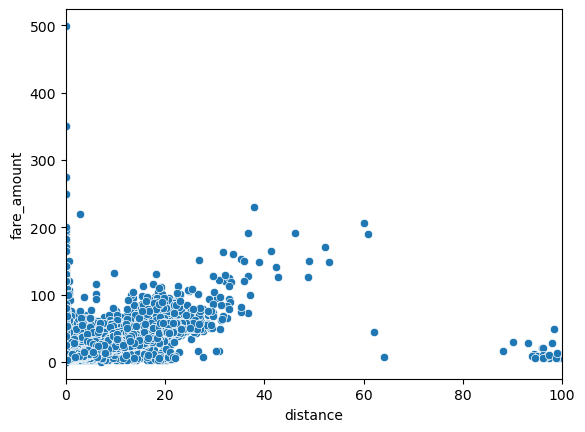

In [32]:
sns.scatterplot(x=df['distance'], y=df['fare_amount'])
plt.xlim([0, 100])

In [33]:
# why s distance 8782 km??

df[df['distance'] > 600] # there is alot of noise / wrong data from sensors reading
# (we have to handle them before sending it to ml)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,distance,haversine_distance
345,15.5,2015-03-05 19:15:07+00:00,0.000000,0.000000,-73.979805,40.786030,1,2015,3,3,19,Spring,Evenning,8666.410254,8666.398012
1064,52.0,2014-02-02 22:27:00+00:00,-73.781095,40.645015,0.000000,0.000000,1,2014,2,6,22,Winter,Night,8647.047814,8647.035598
1523,2.5,2014-05-12 12:00:15+00:00,-74.001849,40.715156,0.000000,0.000000,3,2014,5,0,12,Spring,Afternoon,8666.784652,8666.772408
1942,7.0,2013-02-10 16:18:00+00:00,-0.131667,40.757063,-73.991593,40.749953,1,2013,2,6,16,Winter,Afternoon,6021.122795,6021.114289
2163,5.7,2012-07-21 12:16:00+00:00,-1.216667,40.748597,-74.004822,40.734670,1,2012,7,5,12,Summer,Afternoon,5941.068194,5941.059801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196728,6.9,2011-02-23 19:42:00+00:00,0.000000,0.000000,-73.980827,40.747133,5,2011,2,2,19,Winter,Evenning,8665.697854,8665.685612
197123,7.0,2014-11-18 22:10:03+00:00,-73.962190,40.759158,0.000000,0.000000,1,2014,11,1,22,Autumn,Night,8664.401359,8664.389119
197827,23.5,2013-10-21 01:28:00+00:00,-73.968115,40.801455,0.000000,0.000000,2,2013,10,0,1,Autumn,Night,8665.759409,8665.747167
197925,20.1,2012-06-26 21:29:00+00:00,-0.116667,40.729775,0.000000,0.000000,5,2012,6,1,21,Summer,Evenning,4528.966080,4528.959683


In [34]:
# is distances btn 35 -> 45km have resonable fare_amount?
df[(df['distance'] > 35) & (df['distance'] < 45)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,distance,haversine_distance
23072,126.83,2014-06-11 16:15:00+00:00,-73.781277,40.644915,-73.760570,41.029780,1,2014,6,2,16,Summer,Afternoon,42.830536,42.830475
33491,100.00,2013-12-20 01:34:00+00:00,-74.005518,40.738890,-74.438630,40.683112,1,2013,12,4,1,Winter,Night,37.028747,37.028695
39584,191.80,2012-06-26 22:28:00+00:00,-73.822978,40.788500,-73.548110,41.045037,1,2012,6,1,22,Summer,Night,36.703350,36.703299
72513,147.80,2012-03-16 18:20:00+00:00,-73.876337,40.772152,-73.567932,41.033868,1,2012,3,4,18,Spring,Evenning,38.970626,38.970571
86834,140.25,2013-06-23 18:59:45+00:00,-73.960012,40.773023,-74.031707,41.149037,1,2013,6,6,18,Summer,Evenning,42.242093,42.242033
95436,72.54,2015-04-12 23:07:37+00:00,-73.789253,40.646751,-73.797691,40.976627,1,2015,4,6,23,Spring,Night,36.687457,36.687405
105412,165.33,2014-01-03 09:18:40+00:00,-74.011105,40.725014,-73.527638,40.669371,1,2014,1,4,9,Winter,Morning,41.225266,41.225208
121002,73.50,2014-04-17 01:39:00+00:00,-73.967105,40.756722,-73.768302,41.035317,5,2014,4,3,1,Spring,Night,35.197695,35.197645
122231,127.50,2014-01-02 07:27:11+00:00,-73.992140,40.753925,-73.827590,41.058675,1,2014,1,3,7,Winter,Morning,36.599707,36.599655
123540,152.83,2013-10-02 09:53:00+00:00,-73.968115,40.761885,-73.553203,40.725632,6,2013,10,2,9,Autumn,Morning,35.186077,35.186028


In [35]:
# distance > 60 km doesnt have meaningfull fare_amount so drop them
df[df['distance'] > 60] # 477 rows are nothing

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,distance,haversine_distance
345,15.5,2015-03-05 19:15:07+00:00,0.000000,0.000000,-73.979805,40.786030,1,2015,3,3,19,Spring,Evenning,8666.410254,8666.398012
1064,52.0,2014-02-02 22:27:00+00:00,-73.781095,40.645015,0.000000,0.000000,1,2014,2,6,22,Winter,Night,8647.047814,8647.035598
1523,2.5,2014-05-12 12:00:15+00:00,-74.001849,40.715156,0.000000,0.000000,3,2014,5,0,12,Spring,Afternoon,8666.784652,8666.772408
1942,7.0,2013-02-10 16:18:00+00:00,-0.131667,40.757063,-73.991593,40.749953,1,2013,2,6,16,Winter,Afternoon,6021.122795,6021.114289
2163,5.7,2012-07-21 12:16:00+00:00,-1.216667,40.748597,-74.004822,40.734670,1,2012,7,5,12,Summer,Afternoon,5941.068194,5941.059801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197123,7.0,2014-11-18 22:10:03+00:00,-73.962190,40.759158,0.000000,0.000000,1,2014,11,1,22,Autumn,Night,8664.401359,8664.389119
197827,23.5,2013-10-21 01:28:00+00:00,-73.968115,40.801455,0.000000,0.000000,2,2013,10,0,1,Autumn,Night,8665.759409,8665.747167
197925,20.1,2012-06-26 21:29:00+00:00,-0.116667,40.729775,0.000000,0.000000,5,2012,6,1,21,Summer,Evenning,4528.966080,4528.959683
198660,7.0,2013-01-20 17:58:29+00:00,-67.370360,39.999790,-73.971058,40.753000,1,2013,1,6,17,Winter,Evenning,565.235381,565.234582


In [36]:
indices = df[df['distance'] > 60].index # 477 rows are nothing
df.drop(indices, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

C:\Users\ahmed\AppData\Local\Temp\ipykernel_20824\1283661095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(indices, axis=0, inplace=True)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,distance,haversine_distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evenning,1.683325,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evenning,2.457593,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evenning,5.036384,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning,1.661686,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evenning,4.475456,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198774,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning,0.112210,0.112210
198775,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night,1.875053,1.875050
198776,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night,12.850337,12.850319
198777,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,Afternoon,3.539720,3.539715


In [37]:
# distance = 0?
df[df['distance'] == 0] # 5k from 200k data and wrong values then remove them

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,distance,haversine_distance
5,4.9,2011-02-12 02:27:09+00:00,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,5,2,Winter,Night,0.0,0.0
7,2.5,2012-12-11 13:52:00+00:00,0.000000,0.000000,0.000000,0.000000,1,2012,12,1,13,Winter,Afternoon,0.0,0.0
11,8.5,2011-05-23 22:15:00+00:00,0.000000,0.000000,0.000000,0.000000,1,2011,5,0,22,Spring,Night,0.0,0.0
48,56.8,2013-01-03 22:24:41+00:00,-73.993498,40.764686,-73.993498,40.764686,1,2013,1,3,22,Winter,Night,0.0,0.0
65,6.0,2014-05-05 19:27:00+00:00,0.000000,0.000000,0.000000,0.000000,1,2014,5,0,19,Spring,Evenning,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198660,6.5,2014-02-22 06:45:46+00:00,0.000000,0.000000,0.000000,0.000000,1,2014,2,5,6,Winter,Morning,0.0,0.0
198663,12.5,2012-09-10 17:39:00+00:00,0.000000,0.000000,0.000000,0.000000,2,2012,9,0,17,Autumn,Evenning,0.0,0.0
198697,4.5,2013-06-24 22:17:43+00:00,-73.793768,40.656939,-73.793768,40.656939,1,2013,6,0,22,Summer,Night,0.0,0.0
198712,24.9,2011-03-22 13:59:00+00:00,-73.974618,40.756295,-73.974618,40.756295,5,2011,3,1,13,Spring,Afternoon,0.0,0.0


In [38]:
indices = df[df['distance'] == 0].index
df.drop(indices, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

C:\Users\ahmed\AppData\Local\Temp\ipykernel_20824\3030622724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(indices, axis=0, inplace=True)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,distance,haversine_distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evenning,1.683325,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evenning,2.457593,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evenning,5.036384,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning,1.661686,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evenning,4.475456,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193162,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning,0.112210,0.112210
193163,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night,1.875053,1.875050
193164,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night,12.850337,12.850319
193165,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,Afternoon,3.539720,3.539715


In [39]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance,haversine_distance
count,193167.000000,193167.000000,193167.000000,193167.000000,193167.000000,193167.000000,193167.000000,193167.000000,193167.000000,193167.000000,193167.000000,193167.000000
mean,11.352125,-73.910411,40.688263,-73.909434,40.688577,1.689921,2011.746784,6.283226,3.049993,13.488712,3.352049,3.352044
std,9.721370,2.689964,2.634148,2.690052,2.634475,1.305618,1.862846,3.440100,1.946424,6.516526,3.600281,3.600276
min,0.010000,-75.387785,-74.015515,-75.417737,-74.015750,1.000000,2009.000000,1.000000,0.000000,0.000000,0.000084,0.000084
25%,6.000000,-73.992279,40.736435,-73.991600,40.735307,1.000000,2010.000000,3.000000,1.000000,9.000000,1.279992,1.279991
50%,8.500000,-73.982131,40.753281,-73.980570,40.753731,1.000000,2012.000000,6.000000,3.000000,14.000000,2.180096,2.180093
75%,12.500000,-73.968465,40.767525,-73.965523,40.768318,2.000000,2013.000000,9.000000,5.000000,19.000000,3.937534,3.937528
max,499.000000,40.808425,45.031653,40.831932,45.031598,6.000000,2015.000000,12.000000,6.000000,23.000000,53.066176,53.066101


* Drop Large Fare with Small Distance

* Drop Small Fare with Large Distance

In [40]:
# fare < 1?
df[df['fare_amount'] <= 1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,distance,haversine_distance
20957,0.01,2015-05-31 16:13:41+00:00,-73.991692,40.770802,-73.991692,40.770824,1,2015,5,6,16,Spring,Afternoon,0.002545,0.002545
144208,0.11,2010-03-07 19:11:43+00:00,-73.997221,40.721345,-73.997252,40.721344,1,2010,3,6,19,Spring,Evenning,0.002615,0.002615
184692,0.01,2010-03-08 18:44:57+00:00,-74.000523,40.725868,-73.956960,40.780855,1,2010,3,0,18,Spring,Evenning,7.130873,7.130863


In [41]:
df[(df['fare_amount'] < 1) & (df['distance'] > 1)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,distance,haversine_distance
184692,0.01,2010-03-08 18:44:57+00:00,-74.000523,40.725868,-73.95696,40.780855,1,2010,3,0,18,Spring,Evenning,7.130873,7.130863


In [42]:
indices = df[(df['fare_amount'] < 1) & (df['distance'] > 1)].index
df.drop(indices, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

C:\Users\ahmed\AppData\Local\Temp\ipykernel_20824\2797776329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(indices, axis=0, inplace=True)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,distance,haversine_distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evenning,1.683325,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evenning,2.457593,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evenning,5.036384,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning,1.661686,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evenning,4.475456,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193161,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning,0.112210,0.112210
193162,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night,1.875053,1.875050
193163,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night,12.850337,12.850319
193164,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,Afternoon,3.539720,3.539715


In [43]:
df[(df['fare_amount'] > 100) & (df['distance'] < 1)] # drop them

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,distance,haversine_distance
1988,113.66,2014-11-01 08:42:39+00:00,-73.951227,40.778753,-73.949938,40.778149,1,2014,11,5,8,Autumn,Morning,0.127635,0.127635
5800,105.00,2011-05-06 00:40:00+00:00,-73.752265,40.923303,-73.752270,40.923303,1,2011,5,4,0,Spring,Night,0.000420,0.000420
10953,113.00,2013-12-06 02:17:00+00:00,-74.468770,40.476630,-74.468772,40.476630,2,2013,12,4,2,Winter,Night,0.000169,0.000169
14866,120.30,2011-06-02 15:17:13+00:00,-73.995309,40.769470,-73.988705,40.768919,2,2011,6,3,15,Summer,Afternoon,0.559509,0.559508
15421,150.00,2014-03-23 20:09:01+00:00,-73.870154,40.969677,-73.877171,40.970619,1,2014,3,6,20,Spring,Evenning,0.598372,0.598372
15860,134.29,2015-06-11 22:14:13+00:00,-73.871948,40.983791,-73.871933,40.983829,1,2015,6,3,22,Summer,Night,0.004431,0.004431
18869,180.00,2015-06-14 19:07:53+00:00,-73.567558,41.047142,-73.567596,41.047127,1,2015,6,6,19,Summer,Evenning,0.003621,0.003621
42913,132.33,2013-12-28 20:52:00+00:00,-73.957087,40.926255,-73.957107,40.926252,4,2013,12,5,20,Winter,Evenning,0.001713,0.001713
49318,106.50,2013-05-29 06:37:27+00:00,-74.184196,40.692321,-74.178824,40.689139,1,2013,5,2,6,Spring,Morning,0.574746,0.574746
52177,171.35,2014-01-08 01:09:06+00:00,-74.291586,40.768783,-74.291589,40.768786,1,2014,1,2,1,Winter,Night,0.000418,0.000418


In [44]:
indices = df[(df['fare_amount'] > 100) & (df['distance'] < 1)].index
df.drop(indices, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

C:\Users\ahmed\AppData\Local\Temp\ipykernel_20824\2248310759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(indices, axis=0, inplace=True)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,distance,haversine_distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evenning,1.683325,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evenning,2.457593,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evenning,5.036384,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning,1.661686,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evenning,4.475456,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193137,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning,0.112210,0.112210
193138,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night,1.875053,1.875050
193139,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night,12.850337,12.850319
193140,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,Afternoon,3.539720,3.539715


In [45]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance,haversine_distance
count,193142.000000,193142.000000,193142.000000,193142.000000,193142.000000,193142.000000,193142.000000,193142.000000,193142.000000,193142.000000,193142.000000,193142.000000
mean,11.335255,-73.910408,40.688247,-73.909431,40.688561,1.689964,2011.746756,6.283123,3.049932,13.489096,3.352431,3.352426
std,9.562942,2.690136,2.634317,2.690224,2.634645,1.305650,1.862838,3.440137,1.946444,6.516329,3.600323,3.600318
min,0.010000,-75.387785,-74.015515,-75.417737,-74.015750,1.000000,2009.000000,1.000000,0.000000,0.000000,0.000084,0.000084
25%,6.000000,-73.992279,40.736435,-73.991600,40.735307,1.000000,2010.000000,3.000000,1.000000,9.000000,1.280353,1.280351
50%,8.500000,-73.982131,40.753277,-73.980570,40.753728,1.000000,2012.000000,6.000000,3.000000,14.000000,2.180309,2.180306
75%,12.500000,-73.968468,40.767520,-73.965525,40.768314,2.000000,2013.000000,9.000000,5.000000,19.000000,3.937956,3.937950
max,230.000000,40.808425,45.031653,40.831932,45.031598,6.000000,2015.000000,12.000000,6.000000,23.000000,53.066176,53.066101


In [46]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,distance,haversine_distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evenning,1.683325,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evenning,2.457593,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evenning,5.036384,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning,1.661686,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evenning,4.475456,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193137,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning,0.112210,0.112210
193138,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night,1.875053,1.875050
193139,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night,12.850337,12.850319
193140,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,Afternoon,3.539720,3.539715


In [47]:
# Extract location name features
geocoder = Nominatim(user_agent="Get city") # lat, lon
result = geocoder.reverse("40.740770,-74.005043")
result

Location(350, West 14th Street, West Village, Manhattan, New York County, City of New York, New York, 10014, United States, (40.7405815, -74.0049812, 0.0))

In [48]:
result.raw

{'place_id': 13531780,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'node',
 'osm_id': 2569270994,
 'lat': '40.7405815',
 'lon': '-74.0049812',
 'class': 'place',
 'type': 'house',
 'place_rank': 30,
 'importance': 9.175936522464359e-05,
 'addresstype': 'place',
 'name': '',
 'display_name': '350, West 14th Street, West Village, Manhattan, New York County, City of New York, New York, 10014, United States',
 'address': {'house_number': '350',
  'road': 'West 14th Street',
  'neighbourhood': 'West Village',
  'suburb': 'Manhattan',
  'county': 'New York County',
  'city': 'City of New York',
  'state': 'New York',
  'ISO3166-2-lvl4': 'US-NY',
  'postcode': '10014',
  'country': 'United States',
  'country_code': 'us'},
 'boundingbox': ['40.7405315', '40.7406315', '-74.0050312', '-74.0049312']}

In [49]:
result = geocoder.reverse("40.73854,-73.999817")
result.raw

{'place_id': 15466883,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'node',
 'osm_id': 419361270,
 'lat': '40.7385283',
 'lon': '-73.9998129',
 'class': 'amenity',
 'type': 'bicycle_parking',
 'place_rank': 30,
 'importance': 9.99999999995449e-06,
 'addresstype': 'amenity',
 'name': '',
 'display_name': 'West 14th Street, West Village, Manhattan, New York County, City of New York, New York, 10011, United States',
 'address': {'road': 'West 14th Street',
  'neighbourhood': 'West Village',
  'suburb': 'Manhattan',
  'county': 'New York County',
  'city': 'City of New York',
  'state': 'New York',
  'ISO3166-2-lvl4': 'US-NY',
  'postcode': '10011',
  'country': 'United States',
  'country_code': 'us'},
 'boundingbox': ['40.7384783', '40.7385783', '-73.9998629', '-73.9997629']}

<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>

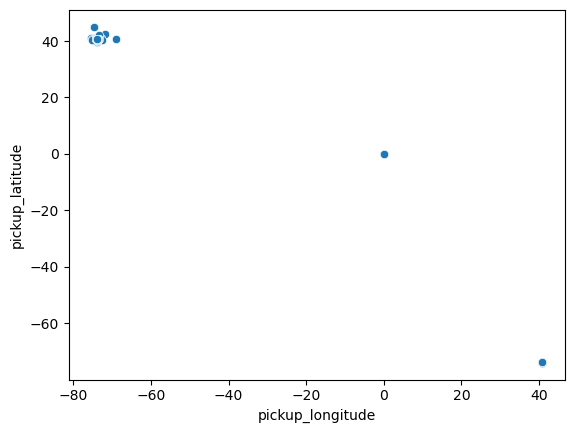

In [50]:
sns.scatterplot(x=df['pickup_longitude'], y=df['pickup_latitude'])

(-72.0, -75.0)

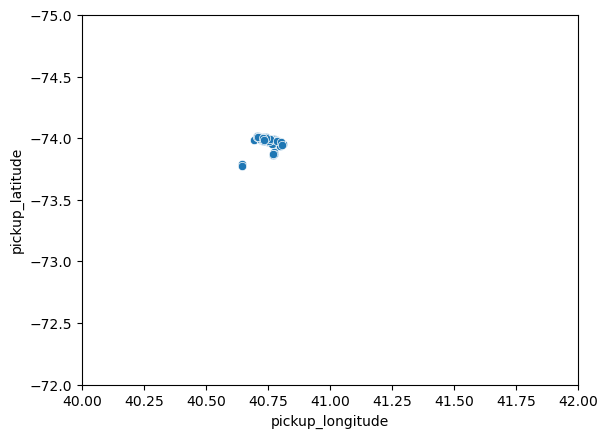

In [51]:
sns.scatterplot(x=df['pickup_longitude'], y=df['pickup_latitude']) # Antarctica
plt.xlim([40, 42])
plt.ylim([-72, -75])

In [52]:
df[(df['pickup_longitude'] > 40) & (df['pickup_longitude'] < 42) & (df['pickup_latitude'] > -75) & (df['pickup_latitude'] < -73)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,distance,haversine_distance
2418,6.00,2013-05-22 10:54:00+00:00,40.746760,-73.982127,40.757287,-73.974800,1,2013,5,2,10,Spring,Morning,0.876444,0.876442
4250,12.50,2013-05-24 00:43:00+00:00,40.751797,-73.970777,40.719787,-73.992137,6,2013,5,4,0,Spring,Night,2.570203,2.570199
4297,9.50,2013-05-25 01:16:00+00:00,40.732897,-73.997740,40.747532,-73.972540,1,2013,5,5,1,Spring,Night,2.837855,2.837851
4610,6.50,2013-05-22 12:38:00+00:00,40.770667,-73.961957,40.761672,-73.967237,1,2013,5,2,12,Spring,Afternoon,0.648870,0.648869
7144,10.50,2013-05-23 00:29:00+00:00,40.714897,-74.009697,40.726197,-73.994370,2,2013,5,3,0,Spring,Night,1.739113,1.739111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178232,9.00,2013-05-25 14:57:00+00:00,40.803672,-73.967302,40.778370,-73.982230,1,2013,5,5,14,Spring,Afternoon,1.832641,1.832639
178956,10.50,2013-05-22 14:43:00+00:00,40.806012,-73.942590,40.785075,-73.957792,1,2013,5,2,14,Spring,Afternoon,1.808784,1.808782
182573,42.33,2013-05-24 00:35:00+00:00,40.771465,-73.875495,40.755835,-73.978210,6,2013,5,4,0,Spring,Night,11.431535,11.431518
183634,57.33,2013-05-23 15:55:00+00:00,40.644182,-73.787107,40.796397,-73.975535,1,2013,5,3,15,Spring,Afternoon,21.472713,21.472683


In [53]:
lat = -73.982127					
lon = 40.746760	
result = geocoder.reverse(f"{lat}, {lon}") # at Antarctica	??!!!
result

(-1.0, 1.0)

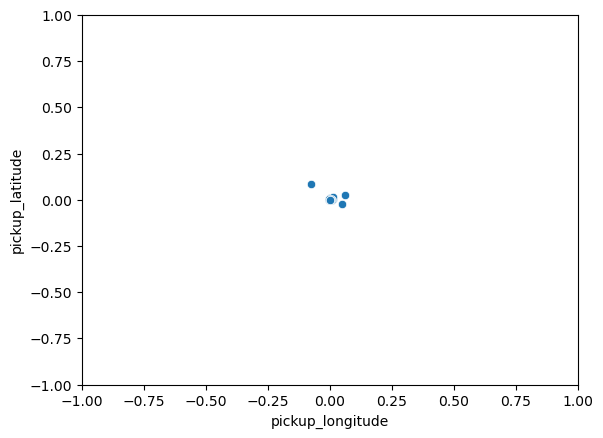

In [54]:
sns.scatterplot(x=df['pickup_longitude'], y=df['pickup_latitude'])
plt.xlim([-1, 1])
plt.ylim([-1, 1])

In [55]:
df[(df['pickup_latitude'] > -1) & (df['pickup_latitude'] < 1) & (df['pickup_longitude'] > -1) & (df['pickup_longitude'] < 1)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,distance,haversine_distance
159,14.50,2010-07-14 17:38:00+00:00,0.001782,0.007380,0.000875,0.005670,1,2010,7,2,17,Summer,Evenning,0.215235,0.215235
22351,10.90,2010-10-09 22:53:00+00:00,-0.076468,0.087237,-0.079742,0.097257,1,2010,10,5,22,Autumn,Night,1.172143,1.172141
35432,11.70,2010-06-12 11:55:00+00:00,0.013518,0.001857,0.010920,0.010308,1,2010,6,5,11,Summer,Morning,0.983112,0.983110
36269,25.30,2011-07-13 15:32:00+00:00,0.012797,0.013382,0.038577,0.010865,1,2011,7,2,15,Summer,Afternoon,2.880240,2.880236
48960,8.10,2010-11-01 18:35:00+00:00,0.009787,-0.003073,0.008988,0.005200,2,2010,11,0,18,Autumn,Evenning,0.924197,0.924196
50506,6.10,2010-11-20 22:19:00+00:00,-0.003813,0.000390,-0.000655,0.000375,1,2010,11,5,22,Autumn,Night,0.351158,0.351158
57935,9.70,2011-04-19 17:41:00+00:00,0.000313,0.000385,-0.001178,0.000497,5,2011,4,1,17,Spring,Evenning,0.166259,0.166259
99884,14.90,2012-01-09 07:51:00+00:00,0.059577,0.023225,0.059377,0.036153,5,2012,1,0,7,Winter,Morning,1.437702,1.437700
111498,12.90,2010-12-23 20:58:00+00:00,0.005028,0.001770,-0.006992,-0.002265,1,2010,12,3,20,Winter,Evenning,1.409863,1.409861
118255,4.10,2010-05-12 23:49:00+00:00,0.002417,-0.000140,0.005163,0.000022,1,2010,5,2,23,Spring,Night,0.305873,0.305872


In [56]:
lat = 0.007380		
lon = 0.001782		
result = geocoder.reverse(f"{lat}, {lon}") # at atlantic ocean ?!!
result

In [57]:
# to read images
import cv2
img = cv2.imread("new_york_city.png") # numpy array
type(img)

numpy.ndarray

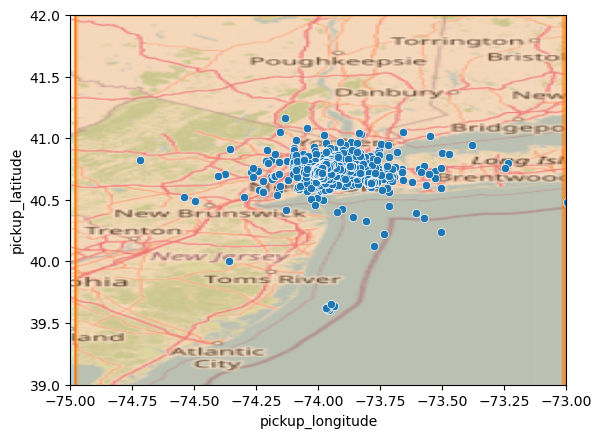

In [58]:
import cv2
img = cv2.imread("new_york_city.png") # numpy array
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img, extent=[-75, -73, 39, 42], aspect='auto')

sns.scatterplot(x=df['pickup_longitude'], y=df['pickup_latitude']) # data is from 3 countries lets get city and country level
plt.xlim([-75, -73])
plt.ylim([39, 42])
plt.show()

(40.0, 41.0)

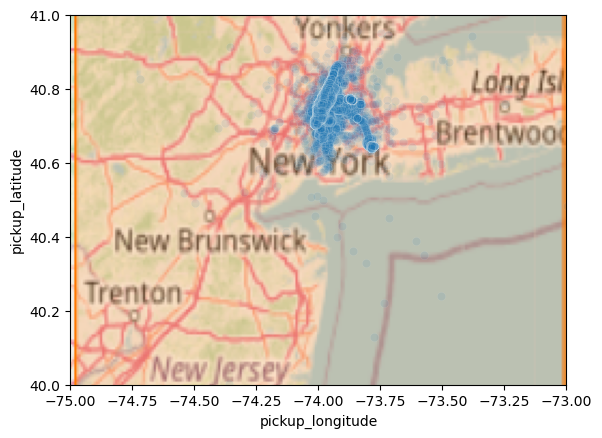

In [59]:
import cv2
img = cv2.imread("new_york_city.png") # numpy array
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
plt.imshow(img, extent=[-75, -73, 39, 42], aspect='auto')

sns.scatterplot(x=df['pickup_longitude'], y=df['pickup_latitude'], alpha=0.1) # data is from 3 countries lets get city and country level
plt.xlim([-75, -73])
plt.ylim([40, 41])

In [60]:
# remove those wrong places
antercatica_indices = df[(df['pickup_longitude'] > 40) & (df['pickup_longitude'] < 42) & (df['pickup_latitude'] > -75) & (df['pickup_latitude'] < -73)].index
ocean_indices = df[(df['pickup_latitude'] > -1) & (df['pickup_latitude'] < 1) & (df['pickup_longitude'] > -1) & (df['pickup_longitude'] < 1)].index

df.drop(antercatica_indices, axis=0, inplace=True)
df.drop(ocean_indices, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

C:\Users\ahmed\AppData\Local\Temp\ipykernel_20824\1713328564.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(antercatica_indices, axis=0, inplace=True)
C:\Users\ahmed\AppData\Local\Temp\ipykernel_20824\1713328564.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(ocean_indices, axis=0, inplace=True)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,distance,haversine_distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evenning,1.683325,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evenning,2.457593,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evenning,5.036384,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning,1.661686,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evenning,4.475456,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193022,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning,0.112210,0.112210
193023,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night,1.875053,1.875050
193024,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night,12.850337,12.850319
193025,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,Afternoon,3.539720,3.539715


In [61]:
geocoder = Nominatim(user_agent="Get city") # lat, lon

def get_pickup_location(row):
    result = geocoder.reverse(f"{row['pickup_latitude']},{row['pickup_longitude']}")
    adress_type = None
    # country = None
    if type(result) != type(None):
        result = result.raw
        adress_type = result['addresstype']
        # country = result['address']['city']
        print(adress_type)
    return adress_type

def get_dropoff_location(row):
    result = geocoder.reverse(f"{row['dropoff_latitude']},{row['dropoff_longitude']}")
    adress_type = None
    # country = None
    if type(result) != type(None):
        result = result.raw
        adress_type = result['addresstype']
        # country = result['address']['country']
        print(adress_type)
    return adress_type

## This step will take a long time so I skipped it on my pc, but try it if you have good network
# df['pickup_adress_type'] = df.apply(get_pickup_location, axis=1)
# df['dropoff_adress_type'] = df.apply(get_dropoff_location, axis=1)
# df[['pickup_adress_type', 'dropoff_adress_type']]

In [62]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance,haversine_distance
count,193027.000000,193027.000000,193027.000000,193027.000000,193027.000000,193027.000000,193027.000000,193027.000000,193027.000000,193027.000000,193027.000000,193027.000000
mean,11.333806,-73.975553,40.750807,-73.974577,40.751127,1.689660,2011.746217,6.283706,3.049532,13.488802,3.352531,3.352527
std,9.561304,0.038032,0.030173,0.038105,0.033795,1.305217,1.863120,3.440900,1.946575,6.516458,3.599586,3.599581
min,0.010000,-75.387785,39.605438,-75.417737,39.607967,1.000000,2009.000000,1.000000,0.000000,0.000000,0.000084,0.000084
25%,6.000000,-73.992284,40.736475,-73.991605,40.735353,1.000000,2010.000000,3.000000,1.000000,9.000000,1.280753,1.280751
50%,8.500000,-73.982137,40.753300,-73.980582,40.753750,1.000000,2012.000000,6.000000,3.000000,14.000000,2.180703,2.180700
75%,12.500000,-73.968502,40.767534,-73.965583,40.768325,2.000000,2013.000000,9.000000,5.000000,19.000000,3.938650,3.938645
max,230.000000,-69.041415,45.031653,-69.046738,45.031598,6.000000,2015.000000,12.000000,6.000000,23.000000,53.066176,53.066101


## EDA

array([[<Axes: title={'center': 'fare_amount'}>,
        <Axes: title={'center': 'pickup_datetime'}>,
        <Axes: title={'center': 'pickup_longitude'}>,
        <Axes: title={'center': 'pickup_latitude'}>],
       [<Axes: title={'center': 'dropoff_longitude'}>,
        <Axes: title={'center': 'dropoff_latitude'}>,
        <Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'pickup_year'}>],
       [<Axes: title={'center': 'pickup_month'}>,
        <Axes: title={'center': 'pickup_weekday'}>,
        <Axes: title={'center': 'pickup_hour'}>,
        <Axes: title={'center': 'distance'}>],
       [<Axes: title={'center': 'haversine_distance'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

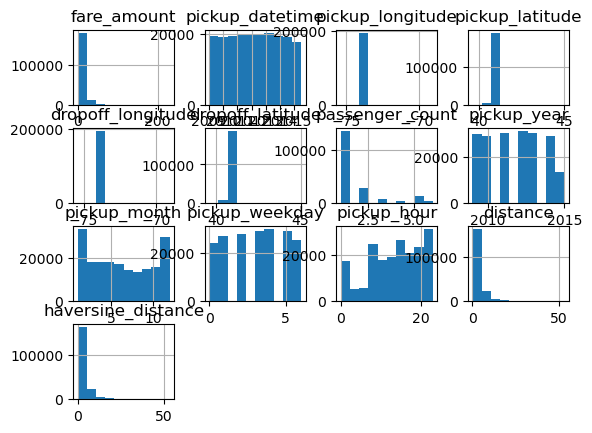

In [63]:
df.hist()

In [64]:
num_cols = df.select_dtypes(include='number').columns
num_cols = num_cols.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
num_cols

Index(['fare_amount', 'passenger_count', 'pickup_year', 'pickup_month',
       'pickup_weekday', 'pickup_hour', 'distance', 'haversine_distance'],
      dtype='object')

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


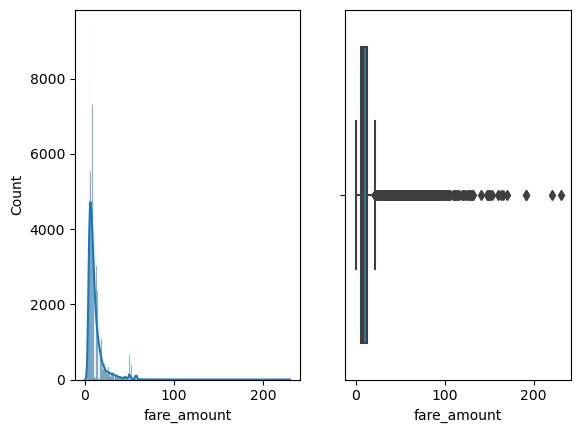

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


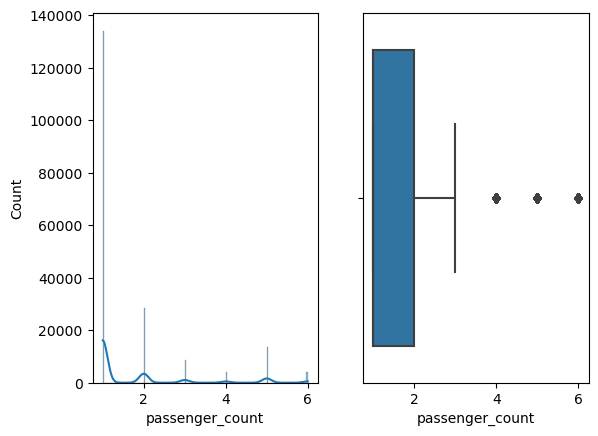

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


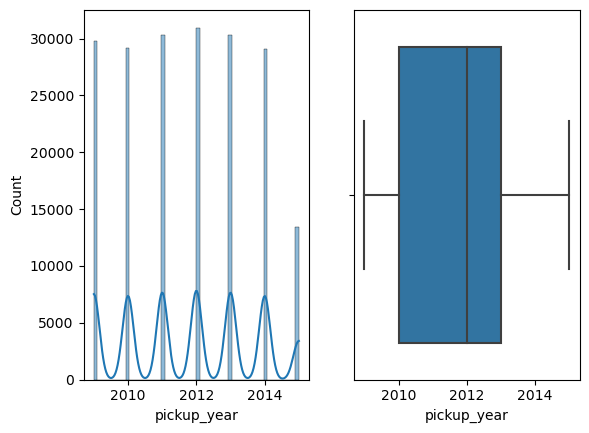

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


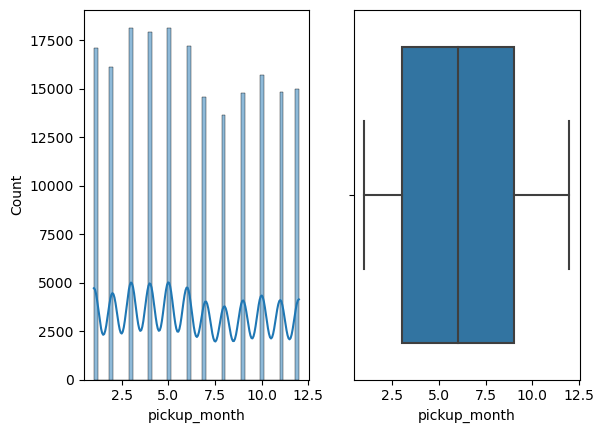

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


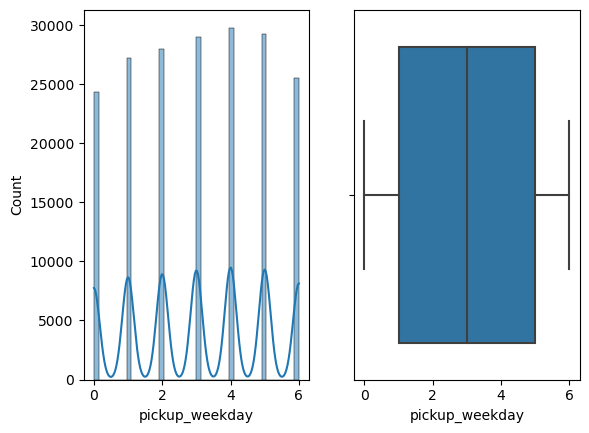

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


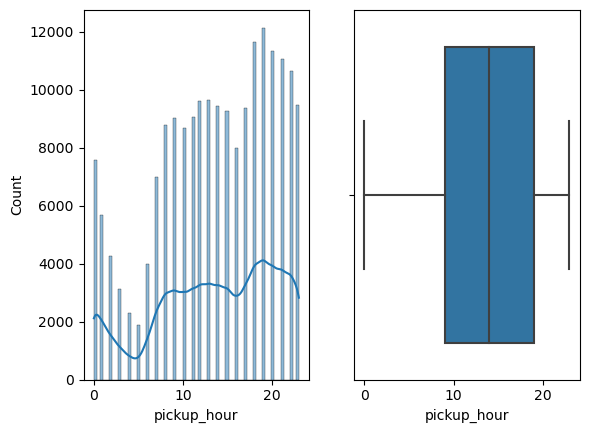

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


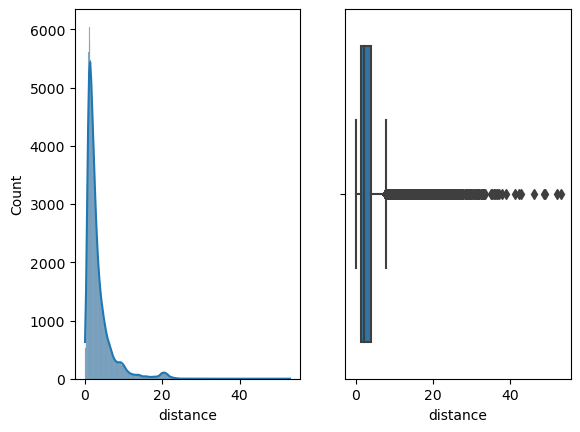

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


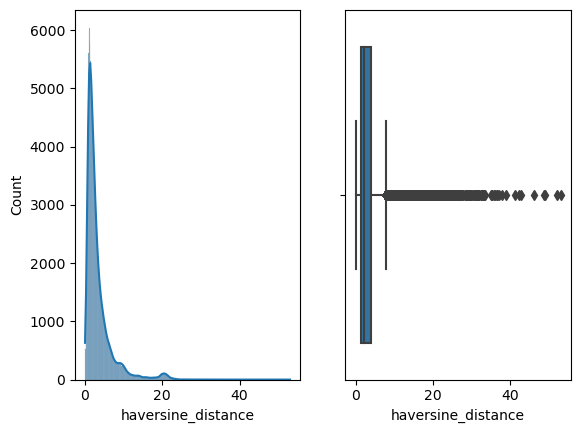

In [65]:
for col in num_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    sns.histplot(df[col], kde=True, ax=axes[0])
    sns.boxplot(df[col], ax=axes[1])
    plt.show()

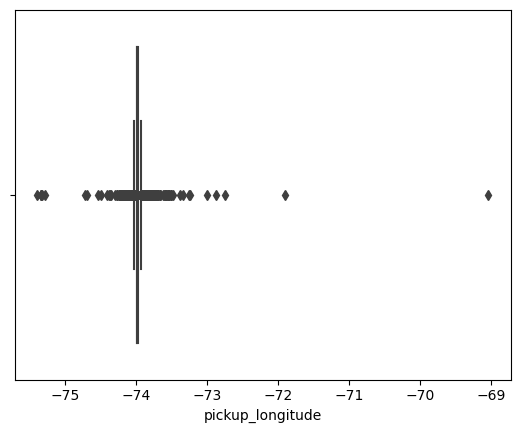

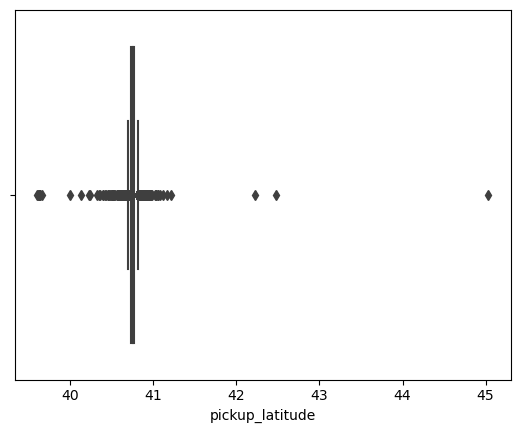

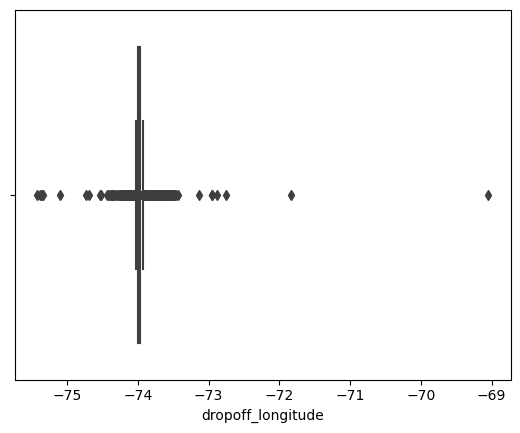

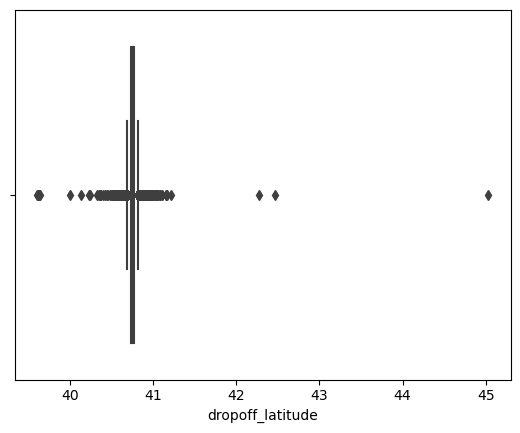

In [66]:
has_outliers = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
for col in has_outliers:
    sns.boxplot(x=df[col])
    plt.show()

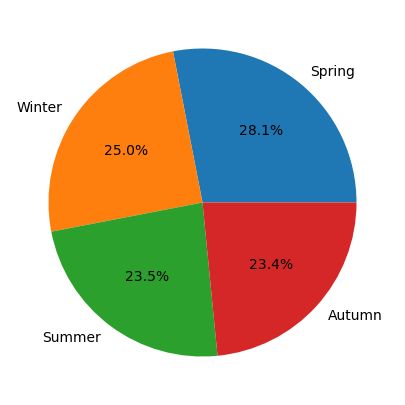

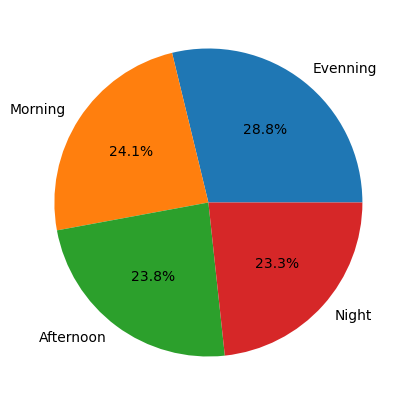

In [67]:
cat_cols = df.select_dtypes(include='O').columns

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    if df[col].nunique() < 7:
        dff = df.groupby(col)[['fare_amount']].count().reset_index().sort_values(by='fare_amount', ascending=False)
        plt.pie(labels=dff[col], x=dff['fare_amount'], autopct="%1.1f%%")
    elif df[col].nunique() < 50:
        sns.countplot(x=df[col])
    else: # > 50 get top 10
        dff = df.groupby(col)[['fare_amount']].count().reset_index().sort_values(by='fare_amount', ascending=False).head(10)
        sns.countplot(x=dff[col])

    plt.show()

C:\Users\ahmed\AppData\Local\Temp\ipykernel_20824\3827667138.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


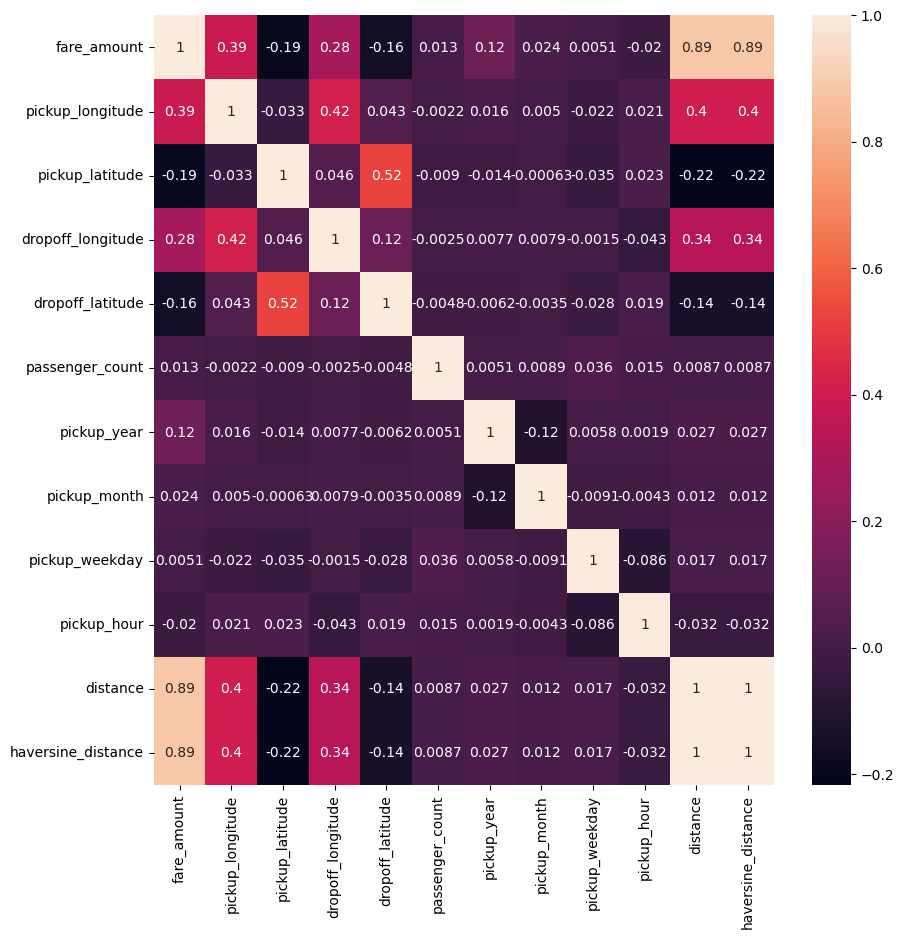

In [68]:
# bi-variate analysis
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [69]:
dff = df.groupby("pickup_year")[['fare_amount']].mean().reset_index().sort_values(by='pickup_year')
dff

,pickup_year,fare_amount
0,2009,9.971143
1,2010,10.114996
2,2011,10.381431
3,2012,11.198855
4,2013,12.667788
5,2014,12.952063
6,2015,12.938701


In [70]:
# How Fare Change with time?
px.line(x=dff['pickup_year'], y=dff['fare_amount'])

<Axes: xlabel='pickup_weekday', ylabel='fare_amount'>

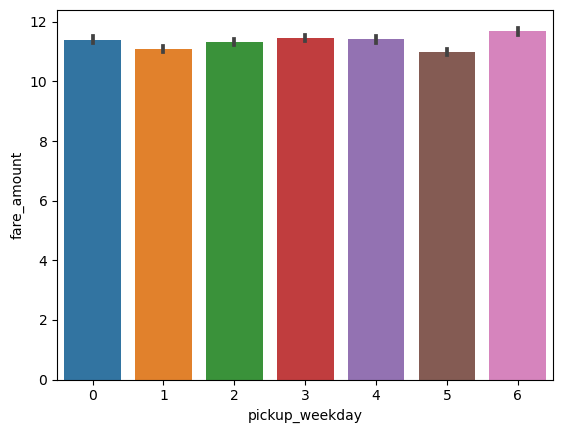

In [71]:
# which weekday have largest fare
sns.barplot(x=df['pickup_weekday'], y=df['fare_amount'], estimator=np.mean)

<Axes: xlabel='pickup_season', ylabel='fare_amount'>

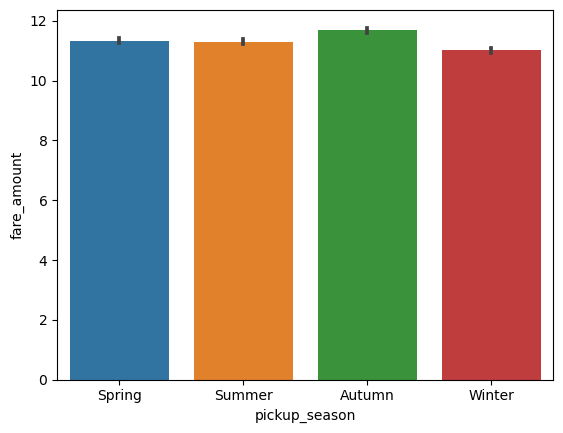

In [72]:
sns.barplot(x=df['pickup_season'], y=df['fare_amount'], estimator=np.mean)

<Axes: xlabel='pickup_period', ylabel='fare_amount'>

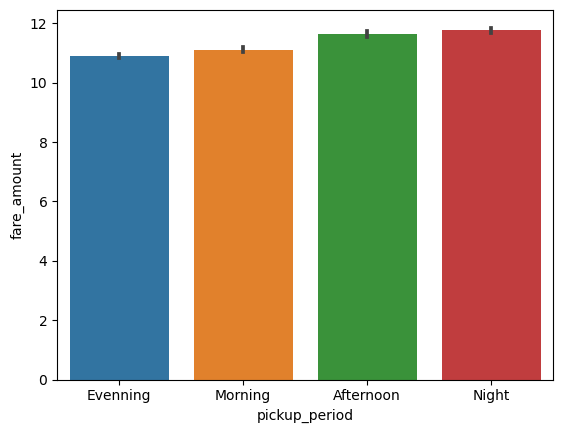

In [73]:
sns.barplot(x=df['pickup_period'], y=df['fare_amount'], estimator=np.mean)

<Axes: xlabel='pickup_hour', ylabel='fare_amount'>

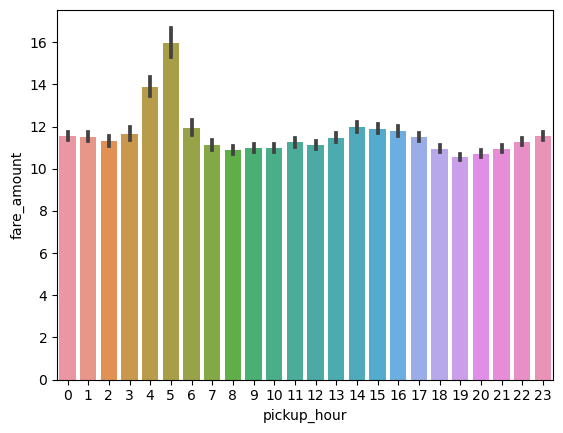

In [74]:
sns.barplot(x=df['pickup_hour'], y=df['fare_amount'], estimator=np.mean) # 5 AM is the highest fare

<Axes: xlabel='distance', ylabel='fare_amount'>

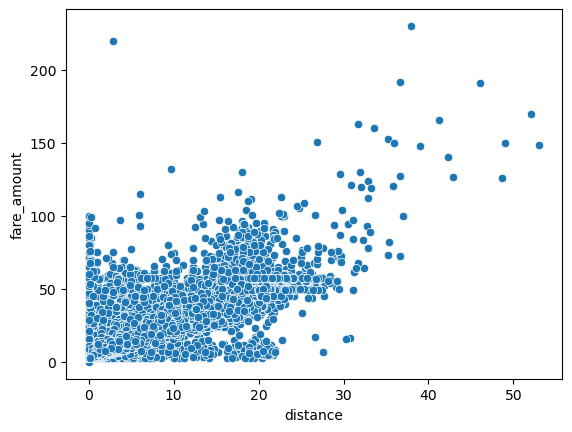

In [75]:
# is there correlation btn distance and fare
sns.scatterplot(x=df['distance'], y=df['fare_amount'])

<Axes: xlabel='distance', ylabel='fare_amount'>

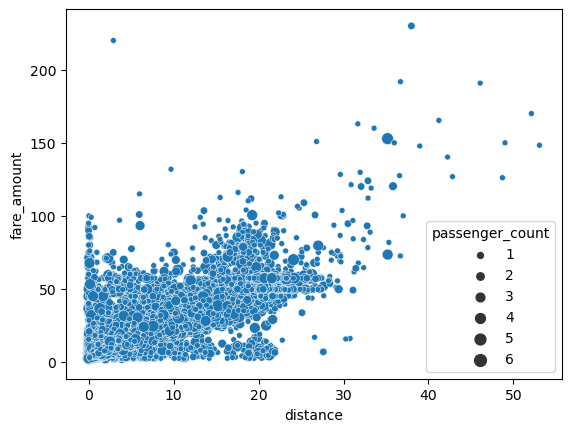

In [76]:
sns.scatterplot(x=df['distance'], y=df['fare_amount'], size=df['passenger_count'])

In [77]:
# more questions

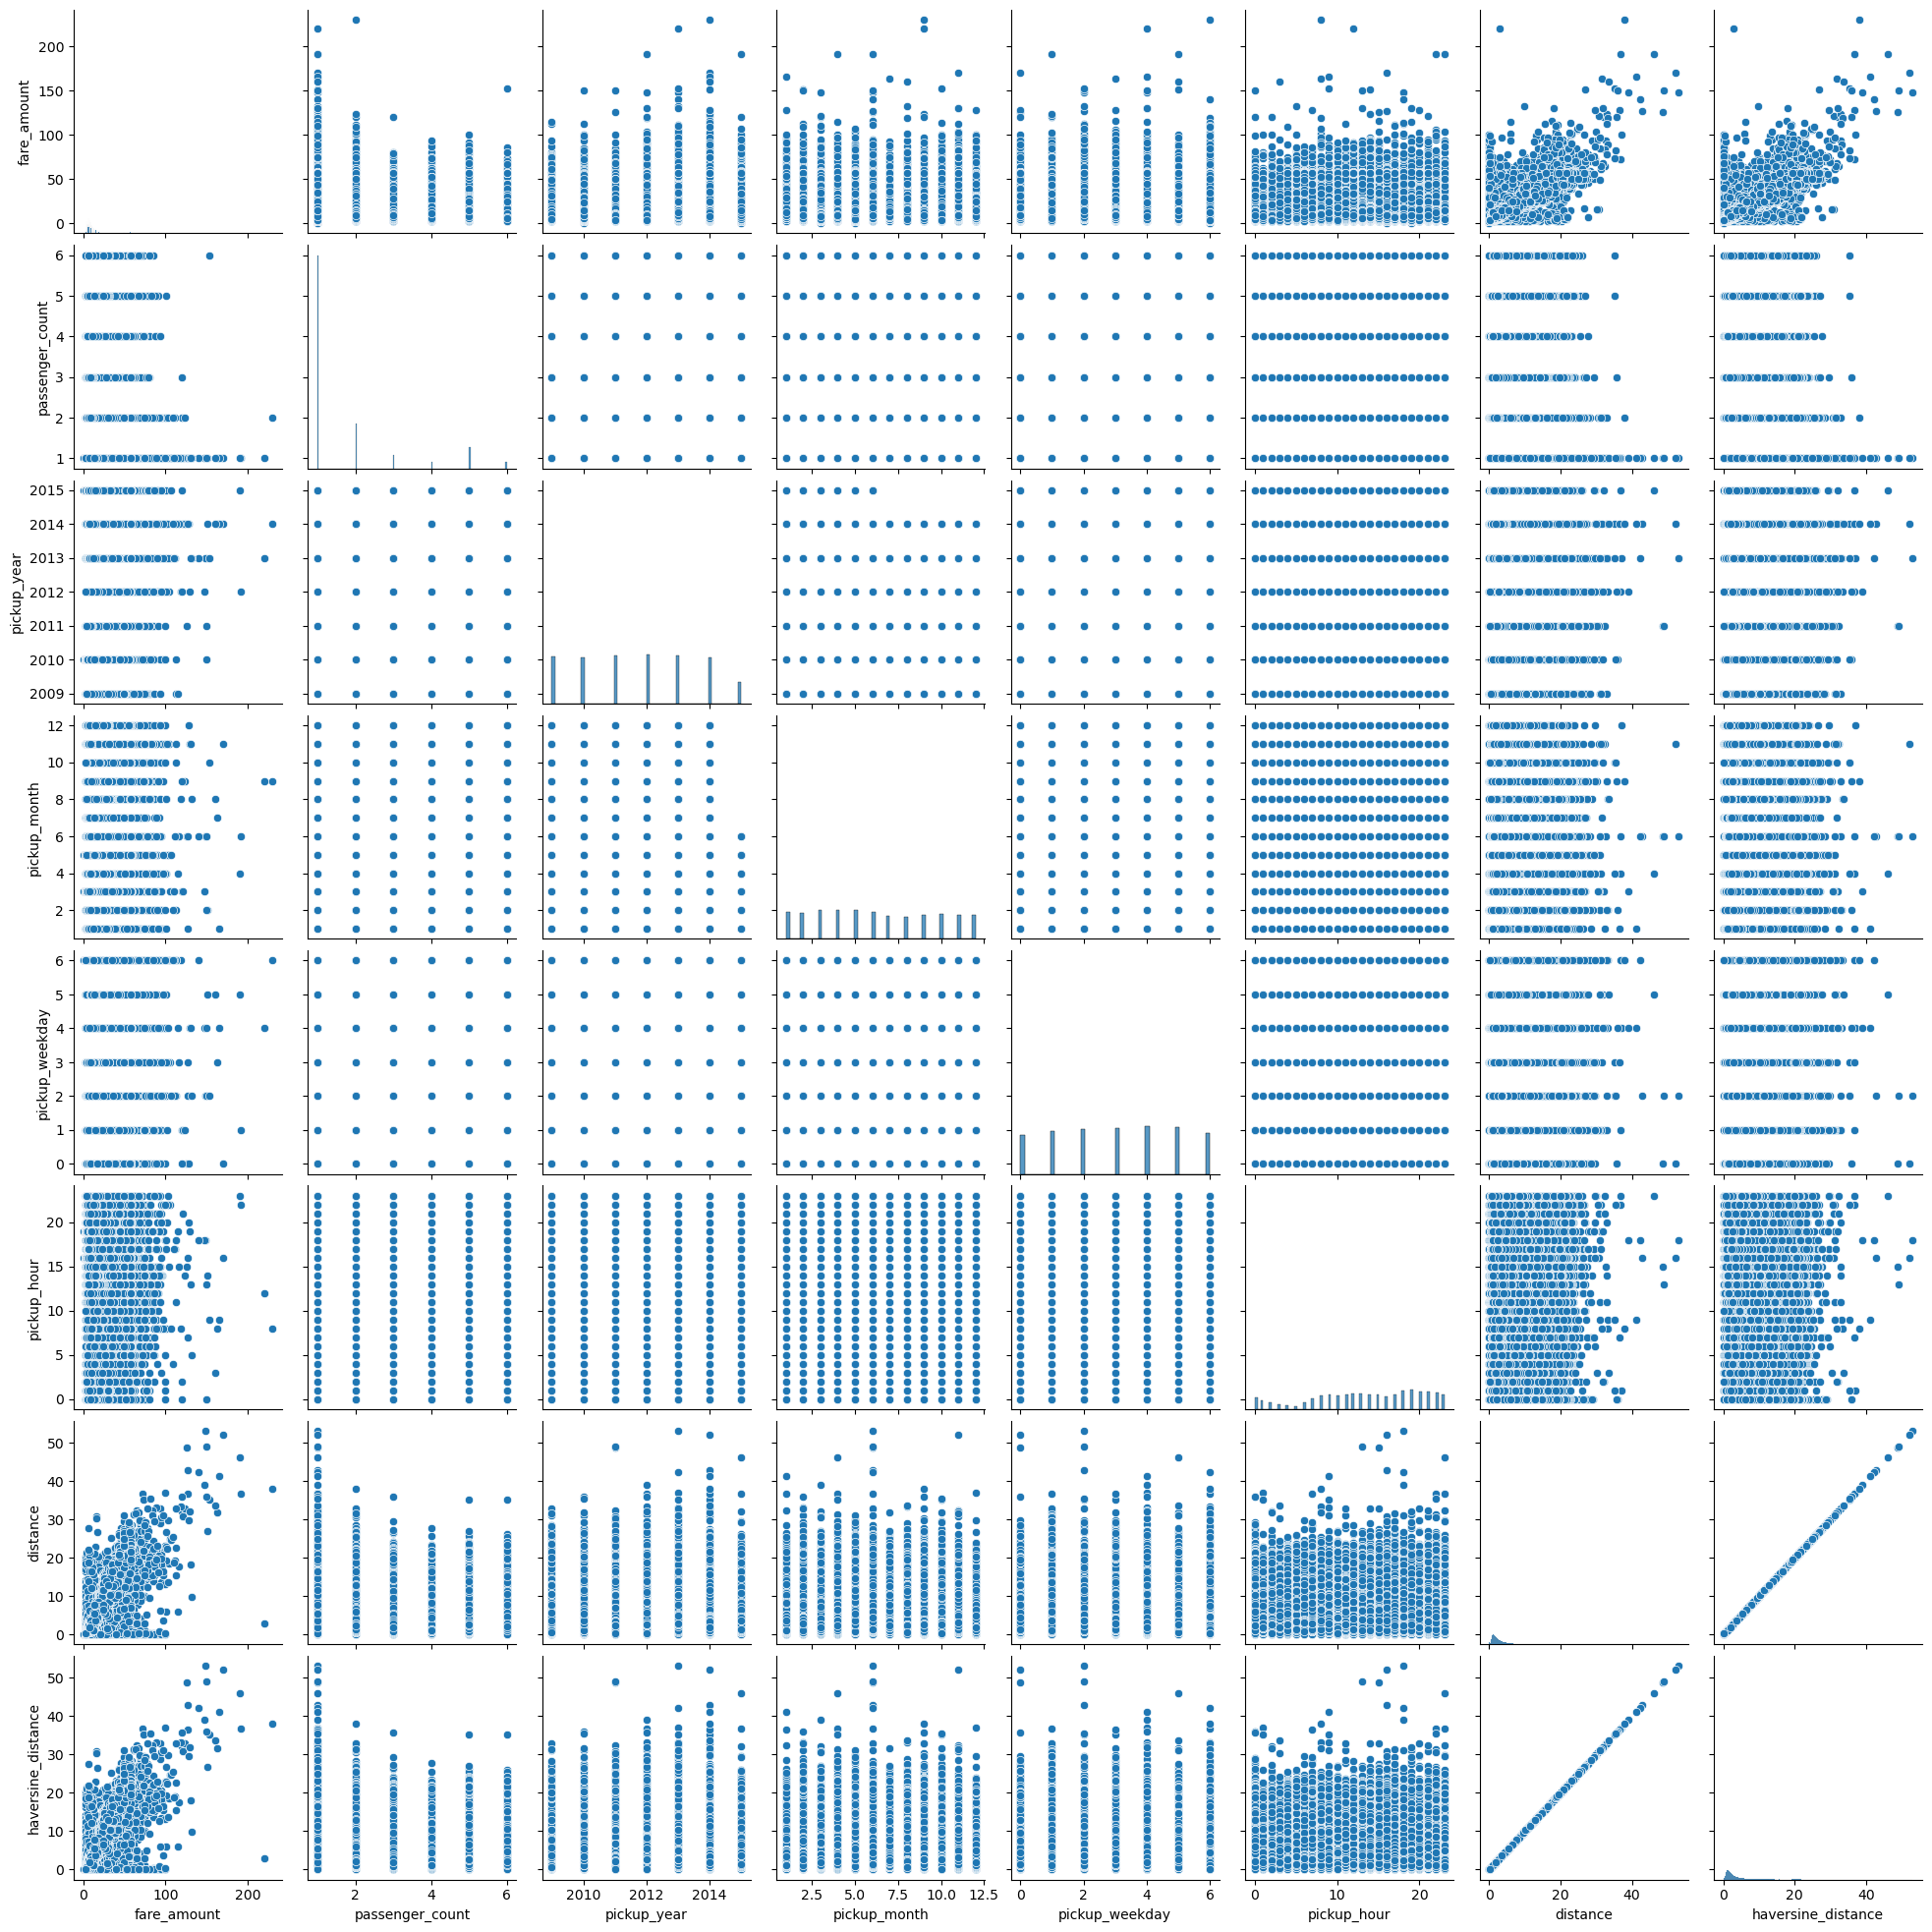

In [78]:
# Multivariate analysis
num_cols = df.select_dtypes(include='number').columns
num_cols = num_cols.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
sns.pairplot(df[num_cols]) # un-corrleated features

# Pre-Processing

In [79]:
# remove un-nessacry features
df.drop(["pickup_datetime"], axis=1, inplace=True)
df

C:\Users\ahmed\AppData\Local\Temp\ipykernel_20824\3737884851.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,distance,haversine_distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evenning,1.683325,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evenning,2.457593,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evenning,5.036384,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning,1.661686,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evenning,4.475456,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193022,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning,0.112210,0.112210
193023,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night,1.875053,1.875050
193024,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night,12.850337,12.850319
193025,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,Afternoon,3.539720,3.539715


In [80]:
# check dublicates
df.duplicated().sum()

0

In [81]:
df.drop_duplicates(inplace=True)

C:\Users\ahmed\AppData\Local\Temp\ipykernel_20824\3006716147.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,distance,haversine_distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,Spring,Evenning,1.683325,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,Summer,Evenning,2.457593,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,Summer,Evenning,5.036384,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,Summer,Morning,1.661686,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,Summer,Evenning,4.475456,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193022,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,Autumn,Morning,0.112210,0.112210
193023,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,Spring,Night,1.875053,1.875050
193024,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,Summer,Night,12.850337,12.850319
193025,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,Spring,Afternoon,3.539720,3.539715


In [83]:
df.isna().sum() # no outliers at target column

fare_amount           0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_year           0
pickup_month          0
pickup_weekday        0
pickup_hour           0
pickup_season         0
pickup_period         0
distance              0
haversine_distance    0
dtype: int64

In [84]:
# split data

# remove haversine_distance as no big diffrence then try again after modeling
# remove un-nessacry features from X

X = df.drop(["fare_amount", "haversine_distance", 'pickup_longitude', "pickup_latitude", "dropoff_longitude", 'dropoff_latitude'], axis=1)
# X = df.drop(["fare_amount", "haversine_distance", 'distance', 'pickup_year', 'pickup_month', 'pickup_weekday', 'pickup_hour', 'pickup_season', 'pickup_period'], axis=1)
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)
X_train

,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,distance
5114,1,2013,10,4,20,Autumn,Evenning,2.953164
156348,2,2009,1,5,17,Winter,Evenning,0.940280
91086,2,2010,6,4,17,Summer,Evenning,1.819496
48349,1,2014,1,3,14,Winter,Afternoon,1.782811
125595,1,2013,10,2,9,Autumn,Morning,3.067669
...,...,...,...,...,...,...,...,...
119879,1,2010,5,0,12,Spring,Afternoon,0.807070
103694,1,2009,3,3,21,Spring,Evenning,1.220915
131932,1,2013,3,6,18,Spring,Evenning,1.760139
146867,1,2013,7,5,12,Summer,Afternoon,1.251324


In [85]:
X_train.shape, X_test.shape # 20k is more than enough to test the model

((173724, 8), (19303, 8))

In [86]:
from sklearn.base import BaseEstimator, TransformerMixin

class Handle_outliers_lb_ub(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        self.n_features_in_ = X.shape[1] 
        q1 = np.percentile(X, 25)
        q3 = np.percentile(X, 75)
        iqr = q3 - q1
        ub_train = q3 + 1.5 * iqr
        lb_train = q1 - 1.5 * iqr
        self.ub_train = ub_train
        self.lb_train = lb_train
        return self # always return self

    def transform(self, X, y=None):
        assert self.n_features_in_ == X.shape[1]
        X[X > self.ub_train] = self.ub_train
        X[X < self.lb_train] = self.lb_train
        return X
    
h_lb_ub = Handle_outliers_lb_ub()
h_lb_ub

Handle_outliers_lb_ub()

In [87]:
from sklearn.base import BaseEstimator, TransformerMixin
class LogTransfomer(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):  # always return self
        # calculate what is needed to make .transform()
        # self.mean_ = np.mean(x)
        self.n_features_in_ = x.shape[1] 
        return self # always return self
    
    def transform(self, x, y=None):
        assert self.n_features_in_ == x.shape[1]
        return np.log1p(x)
    
log_transformer = LogTransfomer()
log_transformer

LogTransfomer()

<Axes: xlabel='distance', ylabel='Count'>

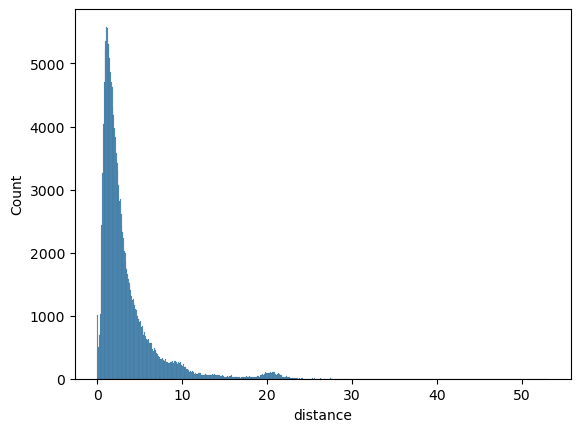

In [88]:
sns.histplot(X_train['distance'])

<Axes: ylabel='Count'>

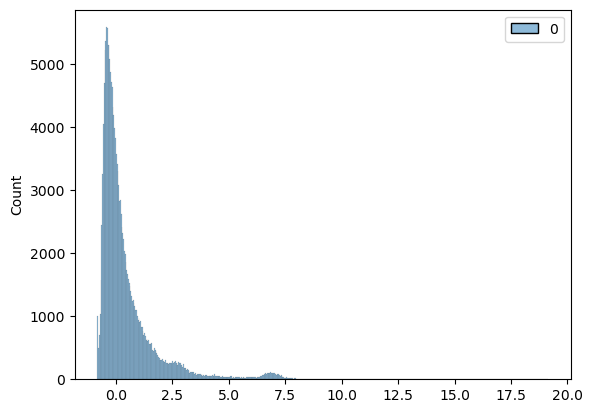

In [89]:
rbs_scaler = RobustScaler()
data = rbs_scaler.fit_transform(X_train[['distance']])
sns.histplot(data)

<Axes: ylabel='Count'>

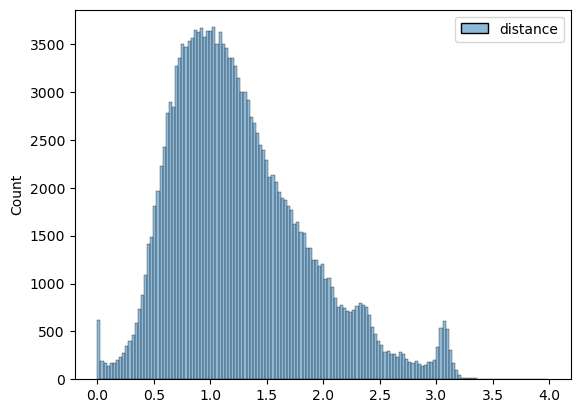

In [90]:
data_logged = log_transformer.fit_transform(X_train[['distance']])
sns.histplot(data_logged)

<Axes: xlabel='distance'>

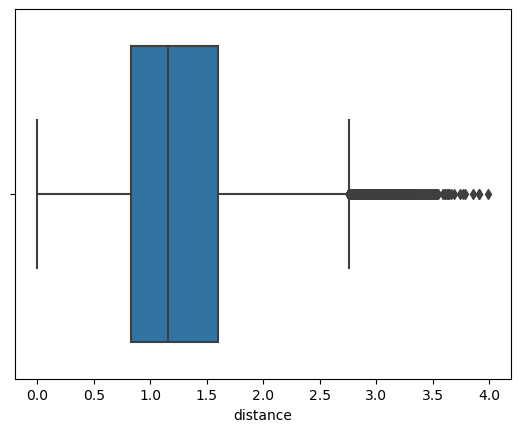

In [91]:
sns.boxplot(x=data_logged['distance'])

<Axes: ylabel='Count'>

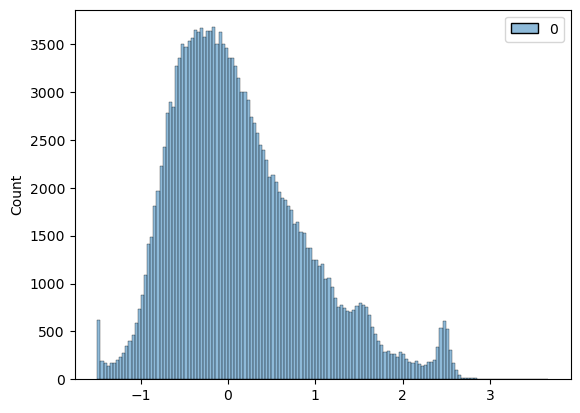

In [92]:
rbs_scaler = RobustScaler()
data_logged = rbs_scaler.fit_transform(data_logged)
sns.histplot(data_logged)

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Axes: >

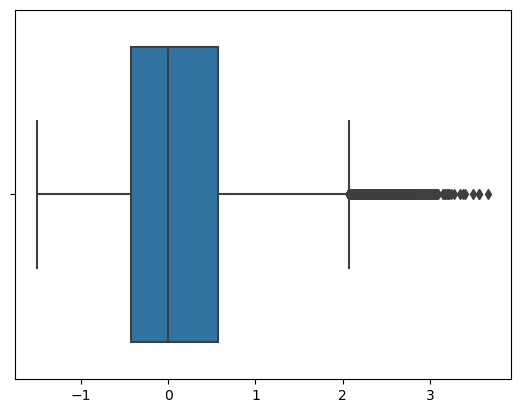

In [93]:
sns.boxplot(data_logged)

In [94]:
# make pipeline

# cat1: passenger_count, pickup_year, pickup_month, pickup_weekday, pickup_hour => categorical encoded data
# cat2: pickup_season => OHE, pickup_period => OHE
# num: distance => right-skewed / outliers / 0 -> 53km
# num2: pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude => impute + scaling_robust
# target: fare_amount => right-skewed / outliers

cat_1_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
])

cat_2_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'))
])

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('handle_outliers', LogTransfomer()),
    ('scale', RobustScaler())
])

num_2_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', RobustScaler())
])

target_pipeline = Pipeline(steps=[
    ('handle_outliers', LogTransfomer())
])

preprocessing = ColumnTransformer(transformers=[
    ("cat_no_change", cat_1_pipeline, ['passenger_count', 'pickup_year', 'pickup_month', 'pickup_weekday', 'pickup_hour']),
    ("cat_pipe", cat_2_pipeline, ['pickup_season', 'pickup_period']),
    ("num_pipeline", num_pipeline, ['distance']),
    # ("num_2_pipeline", num_2_pipeline, ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']),
])

preprocessing

ColumnTransformer(transformers=[('cat_no_change',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['passenger_count', 'pickup_year',
                                  'pickup_month', 'pickup_weekday',
                                  'pickup_hour']),
                                ('cat_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['pickup_season', 'pickup_period']),
                                ('num_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('handle_outliers',
                                                  LogTransfomer()),
                                                 ('scale', RobustScaler())]),
                                 ['distance'])])

# Modeling

* 1) Make Simple Model

* 2) Get validation accuracy to invstigate:
        - Underfitting vs Overfitting (bias - variance tradeoff)

* 3) Hyperparameters tunning (using GridSearchCV or RandomizedSearchCV)

* 4) Get Test Score & confidence interval

* 5) save model

* 6) put it in backend (streamlit / flaskapp)

# 1) Make Simple Model

In [95]:
# 1) Make Simple Model
lr_model = LinearRegression() # train_accuracy = 14.6% with lat and lon without distance feature 

X_train_preprocessed = preprocessing.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

lr_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = lr_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {lr_model.score(X_train_preprocessed, y_train_preprocessed)}") # r2_score
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}") # mean_square_fare

Train Accuracy: 0.787952475656908
Train Loss: 0.06280859929141741


In [96]:
lr_model.coef_

array([[ 0.00407508,  0.03759777,  0.00490568, -0.0022691 ,  0.00069869,
        -0.00724894, -0.020961  , -0.0056144 , -0.05421885, -0.03167463,
        -0.09132732,  0.61764814]])

# 2) Get validation accuracy to invstigate

In [97]:
# 2) Get validation accuracy to invstigate
# (Underfitting vs Overfitting (bias - variance tradeoff))

valid_losses = -1 * cross_val_score(LinearRegression(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(LinearRegression(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

,valid_loss,valid_accuracy
count,5.000000,5.000000
mean,0.062819,0.787912
std,0.001039,0.003459
min,0.061267,0.785154
25%,0.062551,0.785445
50%,0.062868,0.786865
75%,0.063340,0.788460
max,0.064068,0.793636


### Underfitting: let's try polynomial regression

In [98]:
# make pipeline

# cat1: passenger_count, pickup_year, pickup_month, pickup_weekday, pickup_hour => categorical encoded data
# cat2: pickup_season => OHE, pickup_period => OHE
# num: distance => right-skewed / outliers / 0 -> 53km
# target: fare_amount => right-skewed / outliers

cat_1_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
])

cat_2_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'))
])

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('handle_outliers', LogTransfomer()),
    ('scale', RobustScaler())
])


target_pipeline = Pipeline(steps=[
    ('handle_outliers', LogTransfomer())

])

poly_preprocessing = ColumnTransformer(transformers=[
    ("cat_no_change", cat_1_pipeline, ['passenger_count', 'pickup_year', 'pickup_month', 'pickup_weekday', 'pickup_hour']),
    ("cat_pipe", cat_2_pipeline, ['pickup_season', 'pickup_period']),
    ("num_pipeline", num_pipeline, ['distance']),
])

poly_preprocessing

ColumnTransformer(transformers=[('cat_no_change',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['passenger_count', 'pickup_year',
                                  'pickup_month', 'pickup_weekday',
                                  'pickup_hour']),
                                ('cat_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['pickup_season', 'pickup_period']),
                                ('num_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('poly',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False)),
                                                 ('handle_outliers',
                                                  LogTransfomer()),
                                                 ('scale', RobustScaler())]),
                                 ['distance'])])

In [99]:
target_pipeline

Pipeline(steps=[('handle_outliers', LogTransfomer())])

In [100]:
poly_lr_model = LinearRegression()

X_train_preprocessed_poly = poly_preprocessing.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

poly_lr_model.fit(X_train_preprocessed_poly, y_train_preprocessed)
y_train_pred = poly_lr_model.predict(X_train_preprocessed_poly)

print(f"Train Accuracy: {poly_lr_model.score(X_train_preprocessed_poly, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

Train Accuracy: 0.8056318256972328
Train Loss: 0.05757196558934779


In [101]:
poly_lr_model.coef_

array([[ 4.29958848e-03,  3.77489161e-02,  4.84081647e-03,
        -2.00920889e-03,  1.02410488e-03, -7.11772617e-03,
        -2.10583449e-02, -6.21578504e-03, -5.19322560e-02,
        -2.86993489e-02, -9.39416686e-02, -1.78001868e+00,
         5.91555093e+00, -3.52320166e+00]])

In [102]:
X_train_preprocessed_poly.shape

(173724, 14)

# 2) Get validation accuracy to invstigate Underfitting or Overfitting

In [103]:
# 2) Get validation accuracy to invstigate
# (Underfitting vs Overfitting (bias - variance tradeoff))

valid_losses = -1 * cross_val_score(LinearRegression(), X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(LinearRegression(), X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

,valid_loss,valid_accuracy
count,5.000000,5.000000
mean,0.057590,0.805562
std,0.000810,0.002944
min,0.056433,0.802415
25%,0.057089,0.803732
50%,0.057863,0.804815
75%,0.058281,0.806930
max,0.058284,0.809919


### let's try regularization (to see lasso and elasticnet remove un-nessacry feature and see if it helps)

In [104]:
ridge_lr_model = Ridge(alpha=0.05, random_state=42)

X_train_preprocessed_poly = poly_preprocessing.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

ridge_lr_model.fit(X_train_preprocessed_poly, y_train_preprocessed)
y_train_pred = ridge_lr_model.predict(X_train_preprocessed_poly)

print(f"Train Accuracy: {ridge_lr_model.score(X_train_preprocessed_poly, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

Train Accuracy: 0.805631491292772
Train Loss: 0.057572064640142355


In [105]:
ridge_lr_model.coef_

array([[ 4.29895272e-03,  3.77507394e-02,  4.84126181e-03,
        -2.01180661e-03,  1.02318480e-03, -7.11633344e-03,
        -2.10580716e-02, -6.21072670e-03, -5.19627907e-02,
        -2.87154989e-02, -9.39721983e-02, -1.76958879e+00,
         5.87711227e+00, -3.49464655e+00]])

In [106]:
valid_losses = -1 * cross_val_score(Ridge(alpha=0.05, random_state=42), X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(Ridge(alpha=0.05, random_state=42), X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

,valid_loss,valid_accuracy
count,5.000000,5.000000
mean,0.057590,0.805562
std,0.000810,0.002944
min,0.056432,0.802419
25%,0.057090,0.803731
50%,0.057863,0.804808
75%,0.058280,0.806929
max,0.058286,0.809921


In [107]:
## lasso
lasso_lr_model = Lasso(alpha=0.05, random_state=42)

X_train_preprocessed_poly = poly_preprocessing.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

lasso_lr_model.fit(X_train_preprocessed_poly, y_train_preprocessed)
y_train_pred = lasso_lr_model.predict(X_train_preprocessed_poly)

print(f"Train Accuracy: {lasso_lr_model.score(X_train_preprocessed_poly, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

Train Accuracy: 0.7681661630836255
Train Loss: 0.06866931651374755


In [108]:
lasso_lr_model.coef_

array([ 0.00000000e+00,  2.30351655e-02,  3.01438752e-04, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  4.58711499e-01,
        7.63256819e-02,  0.00000000e+00])

In [109]:
valid_losses = -1 * cross_val_score(Lasso(alpha=0.05, random_state=42), X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(Lasso(alpha=0.05, random_state=42), X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

,valid_loss,valid_accuracy
count,5.000000,5.000000
mean,0.068679,0.768128
std,0.001092,0.003370
min,0.067285,0.764636
25%,0.068222,0.766316
50%,0.068715,0.767043
75%,0.068893,0.769280
max,0.070282,0.773366


In [110]:
# elasticnet
elasticnet_lr_model = ElasticNet(alpha=0.05, l1_ratio=0.05, random_state=42)  

X_train_preprocessed_poly = poly_preprocessing.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

elasticnet_lr_model.fit(X_train_preprocessed_poly, y_train_preprocessed)
y_train_pred = elasticnet_lr_model.predict(X_train_preprocessed_poly)

print(f"Train Accuracy: {elasticnet_lr_model.score(X_train_preprocessed_poly, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

Train Accuracy: 0.7929143877696742
Train Loss: 0.061338878055220786


In [111]:
elasticnet_lr_model.coef_

array([ 0.00247021,  0.03675142,  0.00497444, -0.00194339,  0.00056666,
        0.        , -0.00207491,  0.        , -0.0107966 , -0.        ,
       -0.04006724,  0.19531024,  0.21919767,  0.21216337])

In [112]:
valid_losses = -1 * cross_val_score(ElasticNet(alpha=0.05, l1_ratio=0.05, random_state=42), X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(ElasticNet(alpha=0.05, l1_ratio=0.05, random_state=42), X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

,valid_loss,valid_accuracy
count,5.000000,5.000000
mean,0.061346,0.792884
std,0.000946,0.003182
min,0.059982,0.790675
25%,0.060884,0.790805
50%,0.061684,0.790877
75%,0.061712,0.794098
max,0.062467,0.797962


### let's try Stocastic Gradient Descent without poly features first to determine if it overfit or underfit

In [113]:
sgd_model = SGDRegressor(eta0=0.000001, max_iter=2000, tol=0.0000000001, n_iter_no_change=200, random_state=42)

X_train_copy = X_train[:50000] # as it took long time so i tried slice of data [proof of concept] (if model overfit then increaseing data will fit)
y_train_copy = y_train[:50000]
X_train_preprocessed = preprocessing.fit_transform(X_train_copy)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train_copy).reshape(-1, 1))

sgd_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = sgd_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {sgd_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Train Accuracy: 0.5976676629595297
Train Loss: 0.11844698490878934


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



In [114]:
valid_losses = -1 * cross_val_score(SGDRegressor(eta0=0.000001, max_iter=2000, tol=0.0000000001, n_iter_no_change=200, random_state=42), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(SGDRegressor(eta0=0.000001, max_iter=2000, tol=0.0000000001, n_iter_no_change=200, random_state=42), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



,valid_loss,valid_accuracy
count,5.000000,5.000000
mean,0.126877,0.568990
std,0.003732,0.004190
min,0.120831,0.562536
25%,0.126755,0.567918
50%,0.127298,0.569239
75%,0.128643,0.571965
max,0.130858,0.573292


In [115]:
# Solution of Overfitting
sgd_model = SGDRegressor(eta0=0.000001, max_iter=2000, tol=0.0000000001, n_iter_no_change=300, alpha=0.05, penalty='l2', random_state=42)

X_train_copy = X_train[:50000] # as it took long time so i tried slice of data [proof of concept] (if model overfit then increaseing data will fit)
y_train_copy = y_train[:50000]
X_train_preprocessed_poly = poly_preprocessing.fit_transform(X_train_copy)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train_copy).reshape(-1, 1))

sgd_model.fit(X_train_preprocessed_poly, y_train_preprocessed)
y_train_pred = sgd_model.predict(X_train_preprocessed_poly)

print(f"Train Accuracy: {sgd_model.score(X_train_preprocessed_poly, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Train Accuracy: 0.7591942493302271
Train Loss: 0.07089341941874089


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



In [116]:
valid_losses = -1 * cross_val_score(SGDRegressor(eta0=0.000001, max_iter=2000, tol=0.0000000001, n_iter_no_change=200, random_state=42), X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(SGDRegressor(eta0=0.000001, max_iter=2000, tol=0.0000000001, n_iter_no_change=200, random_state=42), X_train_preprocessed_poly, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



,valid_loss,valid_accuracy
count,5.000000,5.000000
mean,0.072275,0.754454
std,0.002374,0.005699
min,0.068930,0.744590
25%,0.071612,0.755212
50%,0.071811,0.756576
75%,0.073915,0.756686
max,0.075107,0.759205


## Try out more complex models to solve underfitting

In [117]:
from sklearn.linear_model import LinearRegression,SGDRegressor, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [118]:
rf_model = RandomForestRegressor()

X_train_preprocessed = preprocessing.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

rf_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = rf_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {rf_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

valid_losses = -1 * cross_val_score(RandomForestRegressor(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(RandomForestRegressor(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Train Accuracy: 0.9731065250553068
Train Loss: 0.007965862825269215


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\ahmed\anaconda3

,valid_loss,valid_accuracy
count,5.000000,5.000000
mean,0.057031,0.807592
std,0.000865,0.002904
min,0.056086,0.804310
25%,0.056182,0.806003
50%,0.057182,0.806327
75%,0.057783,0.810597
max,0.057922,0.810724


In [119]:
gb_model = GradientBoostingRegressor()

X_train_preprocessed = preprocessing.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

gb_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = gb_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {gb_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

valid_losses = -1 * cross_val_score(GradientBoostingRegressor(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(GradientBoostingRegressor(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Train Accuracy: 0.8237264852304357
Train Loss: 0.05221231697540447


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

,valid_loss,valid_accuracy
count,5.000000,5.000000
mean,0.053159,0.820509
std,0.000855,0.002928
min,0.052173,0.818073
25%,0.052318,0.818265
50%,0.053578,0.818875
75%,0.053667,0.823067
max,0.054058,0.824266


In [120]:
svr_model = SVR()

X_train_copy = X_train[:10000] # as it took long time so i tried slice of data [proof of concept] (if model overfit then increaseing data will fit)
y_train_copy = y_train[:10000]
X_train_preprocessed = preprocessing.fit_transform(X_train_copy)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train_copy).reshape(-1, 1))

svr_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = svr_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {svr_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

valid_losses = -1 * cross_val_score(SVR(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(SVR(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Train Accuracy: -0.018885671611316157
Train Loss: 0.30301632177076226


c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

,valid_loss,valid_accuracy
count,5.000000,5.000000
mean,0.303466,-0.020645
std,0.014151,0.008502
min,0.290170,-0.034069
25%,0.296953,-0.023815
50%,0.298679,-0.017293
75%,0.304440,-0.014086
max,0.327088,-0.013962


In [121]:
dt_model = DecisionTreeRegressor()

X_train_preprocessed = preprocessing.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

dt_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = dt_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {dt_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

valid_losses = -1 * cross_val_score(DecisionTreeRegressor(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(DecisionTreeRegressor(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

Train Accuracy: 1.0
Train Loss: 1.4999114558484463e-33


,valid_loss,valid_accuracy
count,5.000000,5.000000
mean,0.112078,0.621713
std,0.003415,0.008636
min,0.107740,0.607887
25%,0.111231,0.620495
50%,0.111574,0.622504
75%,0.112614,0.627522
max,0.117234,0.630156


In [122]:
knn_model = KNeighborsRegressor()

X_train_preprocessed = preprocessing.fit_transform(X_train)
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))

knn_model.fit(X_train_preprocessed, y_train_preprocessed)
y_train_pred = knn_model.predict(X_train_preprocessed)

print(f"Train Accuracy: {knn_model.score(X_train_preprocessed, y_train_preprocessed)}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")

valid_losses = -1 * cross_val_score(KNeighborsRegressor(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='neg_mean_squared_error')
valid_scores = cross_val_score(KNeighborsRegressor(), X_train_preprocessed, y_train_preprocessed, cv=5, scoring='r2')
pd.DataFrame({'valid_loss':valid_losses, 'valid_accuracy':valid_scores}).describe()

Train Accuracy: 0.8059322236546247
Train Loss: 0.05748298754071343


,valid_loss,valid_accuracy
count,5.000000,5.000000
mean,0.090541,0.694319
std,0.001078,0.003173
min,0.089493,0.691346
25%,0.089700,0.691633
50%,0.090387,0.693409
75%,0.090958,0.696645
max,0.092166,0.698560


# 3) Hyperparameters tunning on 5 Models you think will work best


**(using GridSearchCV or RandomizedSearchCV)**

In [123]:
lr_pipeline = Pipeline(steps=[
    ("preprocessing", poly_preprocessing),
    ("model", LinearRegression())
    ])

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_no_change',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['passenger_count',
                                                   'pickup_year',
                                                   'pickup_month',
                                                   'pickup_weekday',
                                                   'pickup_hour']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['pickup_season',
                                                   'pickup_period']),
                                                 ('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('handle_outliers',
                                                                   LogTransfomer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['distance'])])),
                ('model', LinearRegression())])

In [124]:
params = {
    'preprocessing__num_pipeline__poly__degree':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
lr_grid = GridSearchCV(lr_pipeline, params, cv=3, scoring='neg_mean_squared_error')
lr_grid.fit(X_train, y_train_preprocessed)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat_no_change',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['passenger_count',
                                                                          'pickup_year',
                                                                          'pickup_month',
                                                                          'pickup_weekday',
                                                                          'pickup_hour']),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneH...
                                                                        ('num_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(degree=3,
                                                                                                             include_bias=False)),
                                                                                         ('handle_outliers',
                                                                                          LogTransfomer()),
                                                                                         ('scale',
                                                                                          RobustScaler())]),
                                                                         ['distance'])])),
                                       ('model', LinearRegression())]),
             param_grid={'preprocessing__num_pipeline__poly__degree': [1, 2, 3,
                                                                       4, 5, 6,
                                                                       7, 8, 9,
                                                                       10]},
             scoring='neg_mean_squared_error')

In [125]:
lr_grid.best_score_

-0.05671134575926549

In [126]:
lr_grid.best_params_

{'preprocessing__num_pipeline__poly__degree': 10}

In [127]:
ridge_lr_pipeline = Pipeline(steps=[
    ("preprocessing", poly_preprocessing),
    ("model", Ridge(alpha=0.01, random_state=42))
    ])

ridge_lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_no_change',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['passenger_count',
                                                   'pickup_year',
                                                   'pickup_month',
                                                   'pickup_weekday',
                                                   'pickup_hour']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['pickup_season',
                                                   'pickup_period']),
                                                 ('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('handle_outliers',
                                                                   LogTransfomer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['distance'])])),
                ('model', Ridge(alpha=0.01, random_state=42))])

In [128]:
params = {
    'preprocessing__num_pipeline__poly__degree':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'model__alpha': [0, 0.01, 0.03, 0.05, 0.07]
}

y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
ridge_grid = GridSearchCV(ridge_lr_pipeline, params, cv=3, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train_preprocessed)

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=6.5956e-17): result may not be accurate.

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=6.6454e-17): result may not be accurate.

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=6.47817e-17): result may not be accurate.

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.01854e-18): result may not be accurate.

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=2.30486e-18): result may not be accurate.

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\s

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat_no_change',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['passenger_count',
                                                                          'pickup_year',
                                                                          'pickup_month',
                                                                          'pickup_weekday',
                                                                          'pickup_hour']),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneH...
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(degree=3,
                                                                                                             include_bias=False)),
                                                                                         ('handle_outliers',
                                                                                          LogTransfomer()),
                                                                                         ('scale',
                                                                                          RobustScaler())]),
                                                                         ['distance'])])),
                                       ('model',
                                        Ridge(alpha=0.01, random_state=42))]),
             param_grid={'model__alpha': [0, 0.01, 0.03, 0.05, 0.07],
                         'preprocessing__num_pipeline__poly__degree': [1, 2, 3,
                                                                       4, 5, 6,
                                                                       7, 8, 9,
                                                                       10]},
             scoring='neg_mean_squared_error')

In [129]:
ridge_grid.best_score_

-0.056712284577467374

In [130]:
ridge_grid.best_params_

{'model__alpha': 0, 'preprocessing__num_pipeline__poly__degree': 6}

In [131]:
lasso_lr_pipeline = Pipeline(steps=[
    ("preprocessing", poly_preprocessing),
    ("model", Lasso(alpha=0.01, random_state=42))
    ])

lasso_lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_no_change',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['passenger_count',
                                                   'pickup_year',
                                                   'pickup_month',
                                                   'pickup_weekday',
                                                   'pickup_hour']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['pickup_season',
                                                   'pickup_period']),
                                                 ('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('handle_outliers',
                                                                   LogTransfomer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['distance'])])),
                ('model', Lasso(alpha=0.01, random_state=42))])

In [132]:
params = {
    'preprocessing__num_pipeline__poly__degree':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'model__alpha': [0, 0.01, 0.03, 0.05, 0.07]
}

y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
lasso_grid = GridSearchCV(lasso_lr_pipeline, params, cv=3, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train_preprocessed)

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py:1473: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.629e+03, tolerance: 3.436e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat_no_change',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['passenger_count',
                                                                          'pickup_year',
                                                                          'pickup_month',
                                                                          'pickup_weekday',
                                                                          'pickup_hour']),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneH...
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(degree=3,
                                                                                                             include_bias=False)),
                                                                                         ('handle_outliers',
                                                                                          LogTransfomer()),
                                                                                         ('scale',
                                                                                          RobustScaler())]),
                                                                         ['distance'])])),
                                       ('model',
                                        Lasso(alpha=0.01, random_state=42))]),
             param_grid={'model__alpha': [0, 0.01, 0.03, 0.05, 0.07],
                         'preprocessing__num_pipeline__poly__degree': [1, 2, 3,
                                                                       4, 5, 6,
                                                                       7, 8, 9,
                                                                       10]},
             scoring='neg_mean_squared_error')

In [133]:
lasso_grid.best_score_

-0.05850731750265827

In [134]:
lasso_grid.best_params_

{'model__alpha': 0, 'preprocessing__num_pipeline__poly__degree': 10}

In [135]:
elasticnet_lr_pipeline = Pipeline(steps=[
    ("preprocessing", poly_preprocessing),
    ("model", ElasticNet(alpha=0.01, l1_ratio=0.05, random_state=42))
    ])

elasticnet_lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_no_change',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['passenger_count',
                                                   'pickup_year',
                                                   'pickup_month',
                                                   'pickup_weekday',
                                                   'pickup_hour']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['pickup_season',
                                                   'pickup_period']),
                                                 ('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('handle_outliers',
                                                                   LogTransfomer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['distance'])])),
                ('model',
                 ElasticNet(alpha=0.01, l1_ratio=0.05, random_state=42))])

In [136]:
params = {
    'preprocessing__num_pipeline__poly__degree':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'model__alpha': [0, 0.01, 0.03, 0.05, 0.07]
}

y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
elasticnet_grid = GridSearchCV(elasticnet_lr_pipeline, params, cv=3, scoring='neg_mean_squared_error')
elasticnet_grid.fit(X_train, y_train_preprocessed)

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\base.py:1473: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.629e+03, tolerance: 3.436e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat_no_change',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['passenger_count',
                                                                          'pickup_year',
                                                                          'pickup_month',
                                                                          'pickup_weekday',
                                                                          'pickup_hour']),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneH...
                                                                                         ('poly',
                                                                                          PolynomialFeatures(degree=3,
                                                                                                             include_bias=False)),
                                                                                         ('handle_outliers',
                                                                                          LogTransfomer()),
                                                                                         ('scale',
                                                                                          RobustScaler())]),
                                                                         ['distance'])])),
                                       ('model',
                                        ElasticNet(alpha=0.01, l1_ratio=0.05,
                                                   random_state=42))]),
             param_grid={'model__alpha': [0, 0.01, 0.03, 0.05, 0.07],
                         'preprocessing__num_pipeline__poly__degree': [1, 2, 3,
                                                                       4, 5, 6,
                                                                       7, 8, 9,
                                                                       10]},
             scoring='neg_mean_squared_error')

In [137]:
elasticnet_grid.best_score_

-0.05850731750265827

In [138]:
elasticnet_grid.best_params_

{'model__alpha': 0, 'preprocessing__num_pipeline__poly__degree': 10}

In [139]:
sgd_lr_pipeline = Pipeline(steps=[
    ("preprocessing", poly_preprocessing),
    ("model", SGDRegressor(eta0=0.000001, max_iter=2000, tol=0.0000000001, n_iter_no_change=300, alpha=0.05, penalty='elasticnet', random_state=42))
    ])

sgd_lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat_no_change',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['passenger_count',
                                                   'pickup_year',
                                                   'pickup_month',
                                                   'pickup_weekday',
                                                   'pickup_hour']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 spars...
                                                   'pickup_period']),
                                                 ('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('handle_outliers',
                                                                   LogTransfomer()),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['distance'])])),
                ('model',
                 SGDRegressor(alpha=0.05, eta0=1e-06, max_iter=2000,
                              n_iter_no_change=300, penalty='elasticnet',
                              random_state=42, tol=1e-10))])

In [140]:
# GridSearch SGD took large time so I stopped it
params = {
    'preprocessing__num_pipeline__poly__degree':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'model__alpha': [0, 0.01, 0.03, 0.05, 0.07]
}

X_train_copy = X_train[:10000] 
y_train_copy = y_train[:10000]
y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train_copy).reshape(-1, 1))
sgd_lr_grid = GridSearchCV(sgd_lr_pipeline, params, cv=3, scoring='neg_mean_squared_error')
sgd_lr_grid.fit(X_train_copy, y_train_preprocessed)

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat_no_change',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['passenger_count',
                                                                          'pickup_year',
                                                                          'pickup_month',
                                                                          'pickup_weekday',
                                                                          'pickup_hour']),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneH...
                                                                                         ('handle_outliers',
                                                                                          LogTransfomer()),
                                                                                         ('scale',
                                                                                          RobustScaler())]),
                                                                         ['distance'])])),
                                       ('model',
                                        SGDRegressor(alpha=0.05, eta0=1e-06,
                                                     max_iter=2000,
                                                     n_iter_no_change=300,
                                                     penalty='elasticnet',
                                                     random_state=42,
                                                     tol=1e-10))]),
             param_grid={'model__alpha': [0, 0.01, 0.03, 0.05, 0.07],
                         'preprocessing__num_pipeline__poly__degree': [1, 2, 3,
                                                                       4, 5, 6,
                                                                       7, 8, 9,
                                                                       10]},
             scoring='neg_mean_squared_error')

In [141]:
sgd_lr_grid.best_score_

-0.08173296011832755

In [142]:
sgd_lr_grid.best_params_

{'model__alpha': 0, 'preprocessing__num_pipeline__poly__degree': 10}

# 4) Test Accuracy

**Test on Polynomial Regression as it's the best model**

In [143]:
y_train_pred = lr_grid.predict(X_train)
y_test_pred = lr_grid.predict(X_test)

y_train_preprocessed = target_pipeline.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_preprocessed = target_pipeline.transform(np.array(y_test).reshape(-1, 1))

print(f"Train Accuracy: {r2_score(y_true=y_train_preprocessed, y_pred=y_train_pred) * 100}")
print(f"Train Loss: {mean_squared_error(y_true=y_train_preprocessed, y_pred=y_train_pred)}")
print("*" * 50)
print(f"Test Accuracy: {r2_score(y_true=y_test_preprocessed, y_pred=y_test_pred) * 100}")
print(f"Test Loss: {mean_squared_error(y_true=y_test_preprocessed, y_pred=y_test_pred)}")

Train Accuracy: 80.8648037524301
Train Loss: 0.05667856190255045
**************************************************
Test Accuracy: 81.09327018096832
Test Loss: 0.055865207063863935


In [144]:
print(f"Train Loss (without log target): {mean_squared_error(y_true=y_train, y_pred=np.exp(y_train_pred))}")
print("*" * 50)
print(f"Test Loss (without log target): {mean_squared_error(y_true=y_test, y_pred=np.exp(y_test_pred))}")

Train Loss (without log target): 17.824965384732096
**************************************************
Test Loss (without log target): 16.558208269535776


# 5) confidenece interval

In [145]:
# confidence interval on target without log
from scipy import stats

confidence = 0.95
losses = (np.exp(y_test_pred) - np.exp(y_test_preprocessed)) ** 2

np.sqrt(stats.t.interval(confidence, len(losses) - 1, loc=np.mean(losses), scale=stats.sem(losses)))

array([[3.7490042],
       [4.2920277]])

c:\Users\ahmed\anaconda3\envs\machine_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Axes: xlabel='fare_amount'>

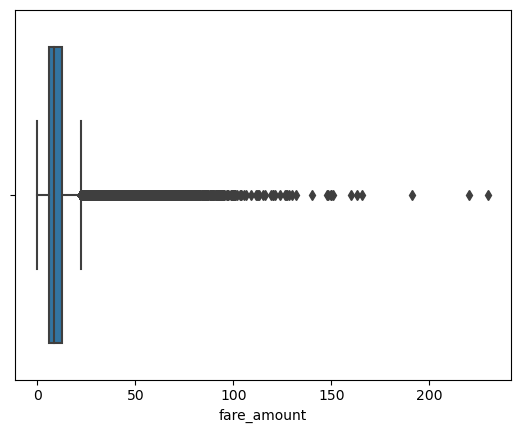

In [146]:
sns.boxplot(y_train) # range of error is from 3.7 -> 4.2 Very Accurate Model

# 6) save model in pkl file then build backend API

In [147]:
import joblib

joblib.dump(lr_grid, "lr_grid.pkl")

['lr_grid.pkl']

In [148]:
best_model = joblib.load("lr_grid.pkl")
best_model

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat_no_change',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['passenger_count',
                                                                          'pickup_year',
                                                                          'pickup_month',
                                                                          'pickup_weekday',
                                                                          'pickup_hour']),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneH...
                                                                        ('num_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(degree=3,
                                                                                                             include_bias=False)),
                                                                                         ('handle_outliers',
                                                                                          LogTransfomer()),
                                                                                         ('scale',
                                                                                          RobustScaler())]),
                                                                         ['distance'])])),
                                       ('model', LinearRegression())]),
             param_grid={'preprocessing__num_pipeline__poly__degree': [1, 2, 3,
                                                                       4, 5, 6,
                                                                       7, 8, 9,
                                                                       10]},
             scoring='neg_mean_squared_error')

In [149]:
final_result = pd.DataFrame({"Model":["RandomForestRegressor", "GradientBoostingRegressor",  "DecisionTreeRegressor", "KNeighborsRegressor", "lr_model", "Lasso", "Ridge", "ElasticNet", "SGDRegressor (50K instances)"], "Train Loss": [0.007954773547020965, 0.05221231697540447, 1.5149531412145706e-33, 0.05748298754071343, 0.057571965589347844 ,0.06866931651374757 , 0.057572064640142334 , 0.061338878055220786, 0.07089341941874089], "Train Accuracy": [0.973143963463834, 0.8237264852304357, 1.0, 0.8059322236546247, 0.8056318256972326 ,0.7681661630836255 , 0.8056314912927721 , 0.7929143877696742, 0.7591942493302271], "Valid Loss":[0.056957, 0.053163,  0.112773, 0.090541, 0.0567113457592562 , 0.05850731750265833 , 0.056712284577467374 , 0.05850731750265833, 0.06646256289310794], "Valid Accuracy":[0.807370, 0.820506, 0.621280, 0.694319, 0.805562 , 0.768128 , 0.805562 , 0.792884, 0.754454]})
final_result = final_result.round(4)
final_result = final_result.sort_values(by='Valid Accuracy', ascending=False).reset_index(drop=True)
final_result.to_csv("regression_models_summery.csv", index=False)
final_result

,Model,Train Loss,Train Accuracy,Valid Loss,Valid Accuracy
0,GradientBoostingRegressor,0.0522,0.8237,0.0532,0.8205
1,RandomForestRegressor,0.0080,0.9731,0.0570,0.8074
2,lr_model,0.0576,0.8056,0.0567,0.8056
3,Ridge,0.0576,0.8056,0.0567,0.8056
4,ElasticNet,0.0613,0.7929,0.0585,0.7929
5,Lasso,0.0687,0.7682,0.0585,0.7681
6,SGDRegressor (50K instances),0.0709,0.7592,0.0665,0.7545
7,KNeighborsRegressor,0.0575,0.8059,0.0905,0.6943
8,DecisionTreeRegressor,0.0000,1.0000,0.1128,0.6213


## 7) Future Steps to Improve Model

* 1) Extract/Collect More Features

* 2) Try More Complex Model (for example XGBRegressor, ..etc) + fine tune them

* 3) Ensamble Best Models

* 4) More Invstigateing in Noisy Data